In [51]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.lines import Line2D
import seaborn as sns
import os
from utils.bootstrap import bootstrap_percent_over

In [53]:
sns.set_style("whitegrid")
sns.set_palette('rocket')

# BASIC EVALS

In [3]:
def get_means(model, loc, explicit_country, eval):
    path = f'/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/{model}-{loc}-{explicit_country}-20-1.0'
    
    means = [[], []]
    
    for i in range(1, 21):
        try:
            means[0].append(np.load(f'{path}/run{i}_fixed/{eval}_move1.npy').mean())
            means[1].append(np.load(f'{path}/run{i}_fixed/{eval}_move2.npy').mean())
        except:
            pass

    return means

In [4]:
gpt35t_free_False_bert = get_means('gpt3.5turbo', 'free', False, 'bert')
gpt35t_free_True_bert = get_means('gpt3.5turbo', 'free', True, 'bert')
gpt4_free_False_bert = get_means('gpt4', 'free', False, 'bert')
gpt4_free_True_bert = get_means('gpt4', 'free', True, 'bert')

In [5]:
gpt35t_free_False_bidir = get_means('gpt3.5turbo', 'free', False, 'bidir')
gpt35t_free_True_bidir = get_means('gpt3.5turbo', 'free', True, 'bidir')
gpt4_free_False_bidir = get_means('gpt4', 'free', False, 'bidir')
gpt4_free_True_bidir = get_means('gpt4', 'free', True, 'bidir')

In [6]:
gpt35t_rank_False_kendall = get_means('gpt3.5turbo', 'rank', False, 'kendall')
gpt35t_rank_True_kendall = get_means('gpt3.5turbo', 'rank', True, 'kendall')
gpt4_rank_False_kendall = get_means('gpt4', 'rank', False, 'kendall')
gpt4_rank_True_kendall = get_means('gpt4', 'rank', True, 'kendall')

In [7]:
gpt35t_rank_False_spearman = get_means('gpt3.5turbo', 'rank', False, 'spearman')
gpt35t_rank_True_spearman = get_means('gpt3.5turbo', 'rank', True, 'spearman')
gpt4_rank_False_spearman = get_means('gpt4', 'rank', False, 'spearman')
gpt4_rank_True_spearman = get_means('gpt4', 'rank', True, 'spearman')

In [8]:
gpt35t_rank_False_hamming = get_means('gpt3.5turbo', 'rank', False, 'hamming')
gpt35t_rank_True_hamming = get_means('gpt3.5turbo', 'rank', True, 'hamming')
gpt4_rank_False_hamming = get_means('gpt4', 'rank', False, 'hamming')
gpt4_rank_True_hamming = get_means('gpt4', 'rank', True, 'hamming')

# RANK PLOTTING

In [9]:
all_kendall = pd.DataFrame(
    [
        gpt35t_rank_False_kendall[0], gpt35t_rank_False_kendall[1],
        gpt35t_rank_True_kendall[0], gpt35t_rank_True_kendall[1],
        gpt4_rank_False_kendall[0], gpt4_rank_False_kendall[1],
        gpt4_rank_True_kendall[0], gpt4_rank_True_kendall[1],
    ]
).T

In [10]:
all_kendall.columns = [
    '35t-anon-1', '35t-anon-2',
    '35t-exp-1', '35t-exp-2',
    '4-anon-1', '4-anon-2',
    '4-exp-1', '4-exp-2'
]

In [11]:
all_kendall = all_kendall.fillna(all_kendall.mean()) # fills nan values with mean of column

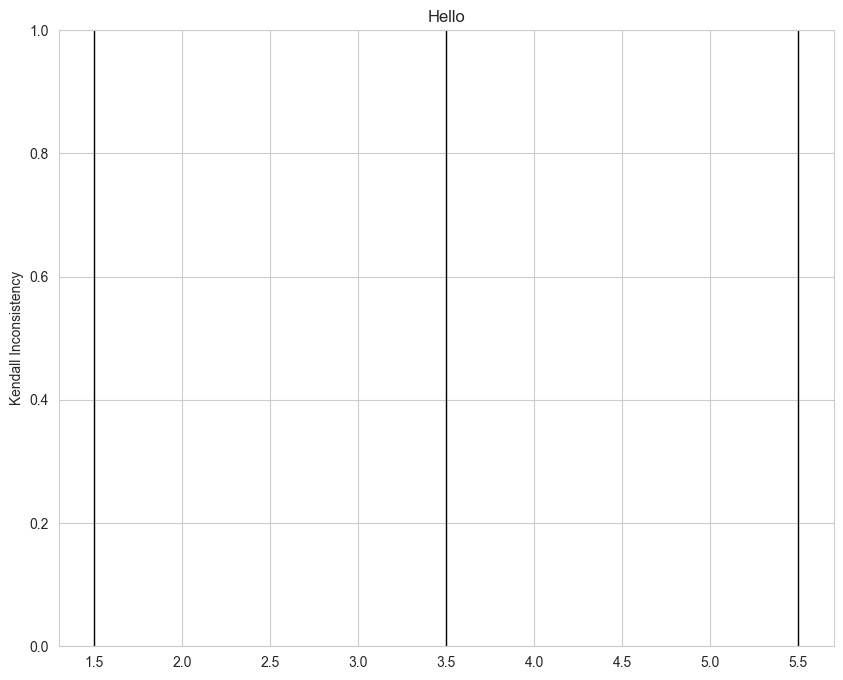

In [12]:
plt.figure(figsize=(10, 8))
sns.boxplot(all_kendall, linewidth=1.2)
plt.ylabel('Kendall Inconsistency')
plt.title('Hello')
for i in [1.5, 3.5, 5.5]:
    plt.axvline(x=i, color='black', linewidth=1)

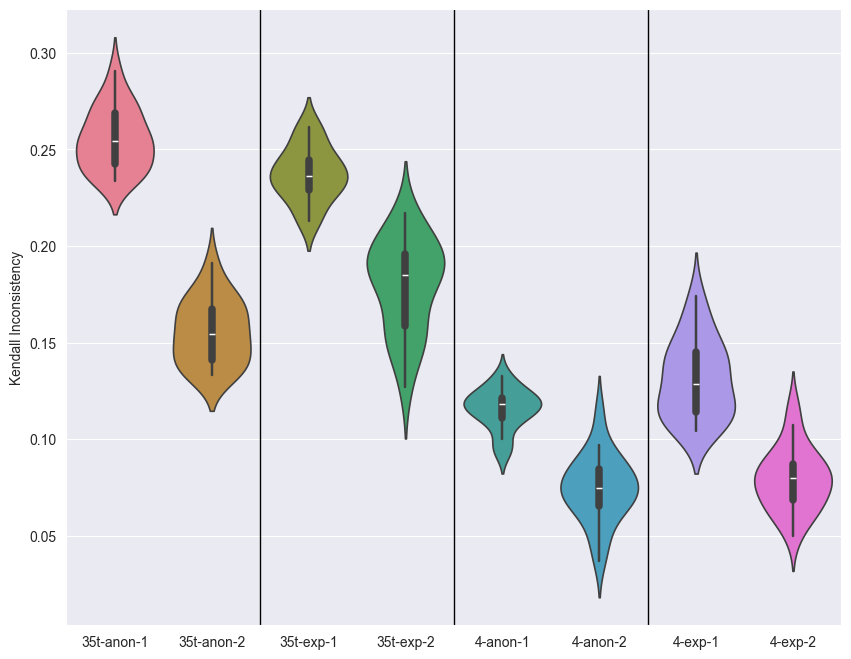

In [72]:
plt.figure(figsize=(10, 8))
sns.violinplot(all_kendall, linewidth=1.2)
plt.ylabel('Kendall Inconsistency')
plt.title('')
for i in [1.5, 3.5, 5.5]:
    plt.axvline(x=i, color='black', linewidth=1)

In [73]:
all_spearman = pd.DataFrame(
    [
        gpt35t_rank_False_spearman[0], gpt35t_rank_False_spearman[1],
        gpt35t_rank_True_spearman[0], gpt35t_rank_True_spearman[1],
        gpt4_rank_False_spearman[0], gpt4_rank_False_spearman[1],
        gpt4_rank_True_spearman[0], gpt4_rank_True_spearman[1],
    ]
).T

In [74]:
all_spearman.columns = [
    '35t-anon-1', '35t-anon-2',
    '35t-exp-1', '35t-exp-2',
    '4-anon-1', '4-anon-2',
    '4-exp-1', '4-exp-2'
]

In [75]:
all_spearman = all_spearman.fillna(all_spearman.mean()) # fills nan values with mean of column

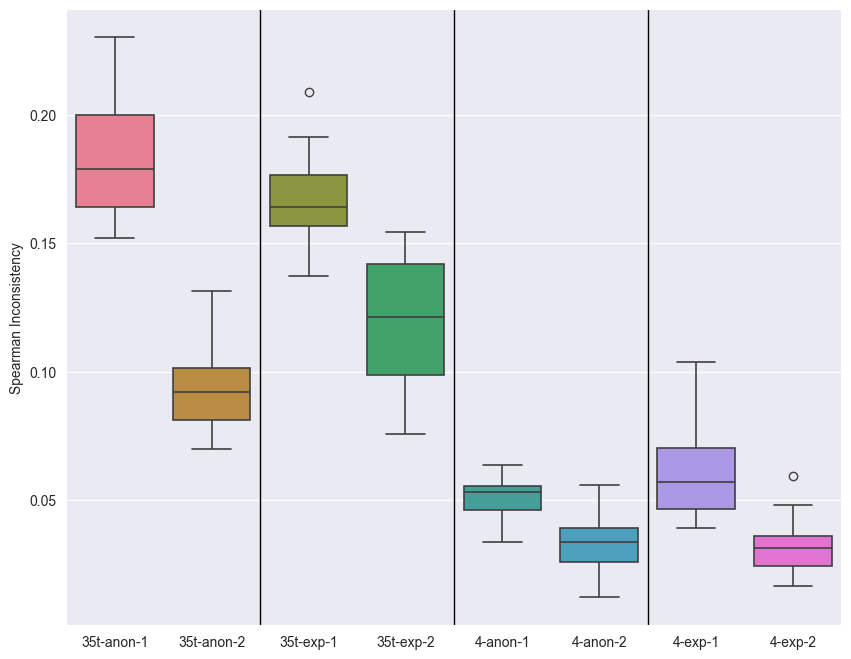

In [76]:
plt.figure(figsize=(10, 8))
sns.boxplot(all_spearman, linewidth=1.2)
plt.ylabel('Spearman Inconsistency')
plt.title('')
for i in [1.5, 3.5, 5.5]:
    plt.axvline(x=i, color='black', linewidth=1)

In [81]:
all_hamming = pd.DataFrame(
    [
        gpt35t_rank_False_hamming[0], gpt35t_rank_False_hamming[1],
        gpt35t_rank_True_hamming[0], gpt35t_rank_True_hamming[1],
        gpt4_rank_False_hamming[0], gpt4_rank_False_hamming[1],
        gpt4_rank_True_hamming[0], gpt4_rank_True_hamming[1],
    ]
).T

In [82]:
all_hamming.columns = [
    '35t-anon-1', '35t-anon-2',
    '35t-exp-1', '35t-exp-2',
    '4-anon-1', '4-anon-2',
    '4-exp-1', '4-exp-2'
]

In [83]:
all_hamming = all_hamming.fillna(all_hamming.mean()) # fills nan values with mean of column

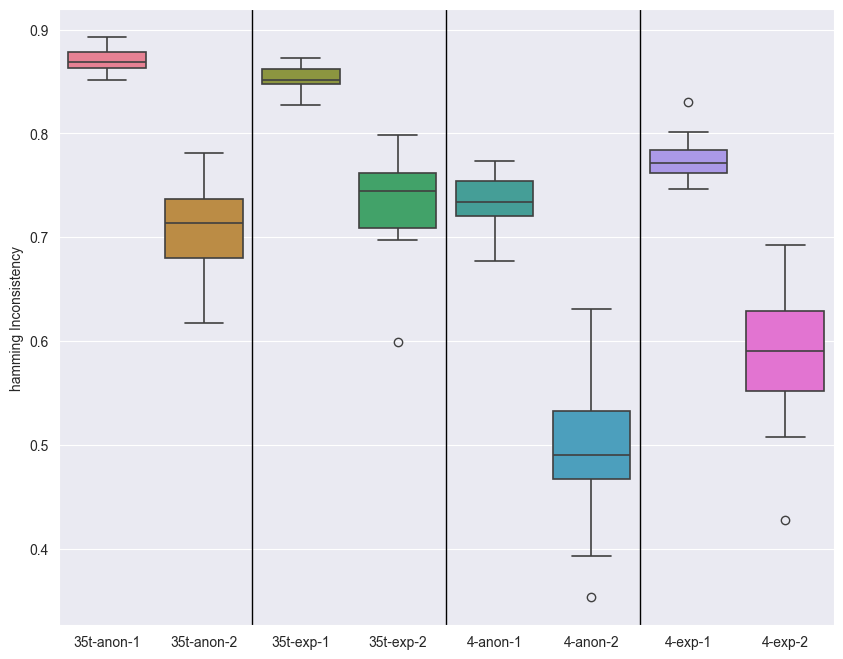

In [85]:
plt.figure(figsize=(10, 8))
sns.boxplot(all_hamming, linewidth=1.2)
plt.ylabel('hamming Inconsistency')
plt.title('')
for i in [1.5, 3.5, 5.5]:
    plt.axvline(x=i, color='black', linewidth=1)

# BERT PLOTTING

In [86]:
all_bert = pd.DataFrame(
    [
        gpt35t_free_False_bert[0], gpt35t_free_False_bert[1],
        gpt35t_free_True_bert[0], gpt35t_free_True_bert[1],
        gpt4_free_False_bert[0], gpt4_free_False_bert[1],
        gpt4_free_True_bert[0], gpt4_free_True_bert[1],
    ]
).T

In [87]:
all_bert.columns = [
    '35t-anon-1', '35t-anon-2',
    '35t-exp-1', '35t-exp-2',
    '4-anon-1', '4-anon-2',
    '4-exp-1', '4-exp-2'
]

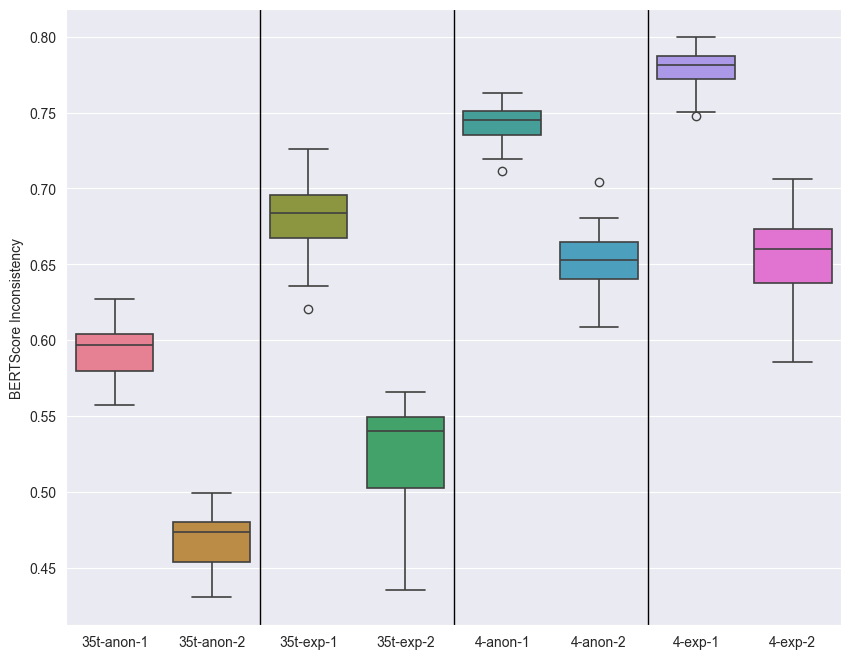

In [88]:
plt.figure(figsize=(10, 8))
sns.boxplot(all_bert, linewidth=1.2)
plt.ylabel('BERTScore Inconsistency')
plt.title('')
for i in [1.5, 3.5, 5.5]:
    plt.axvline(x=i, color='black', linewidth=1)

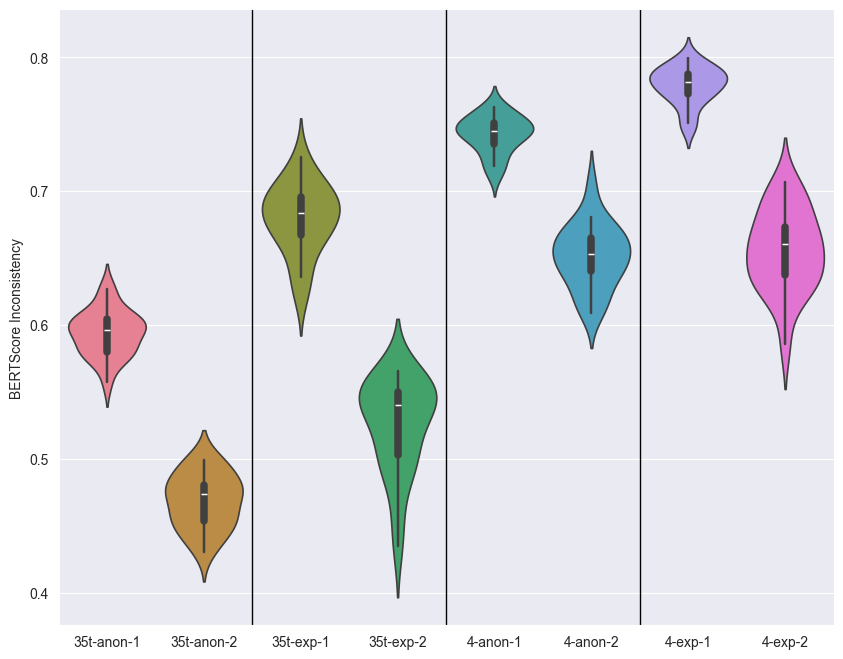

In [89]:
plt.figure(figsize=(10, 8))
sns.violinplot(all_bert, linewidth=1.2)
plt.ylabel('BERTScore Inconsistency')
plt.title('')
for i in [1.5, 3.5, 5.5]:
    plt.axvline(x=i, color='black', linewidth=1)

In [90]:
all_bidir = pd.DataFrame(
    [
        gpt35t_free_False_bidir[0], gpt35t_free_False_bidir[1],
        gpt35t_free_True_bidir[0], gpt35t_free_True_bidir[1],
        gpt4_free_False_bidir[0], gpt4_free_False_bidir[1],
        gpt4_free_True_bidir[0], gpt4_free_True_bidir[1],
    ]
).T

In [92]:
all_bidir.columns = [
    '35t-anon-1', '35t-anon-2',
    '35t-exp-1', '35t-exp-2',
    '4-anon-1', '4-anon-2',
    '4-exp-1', '4-exp-2'
]

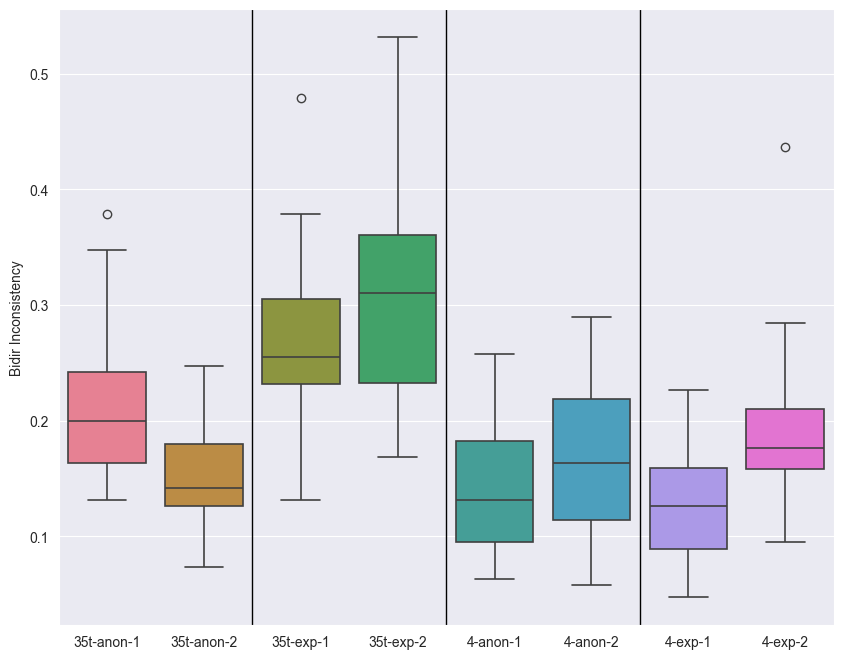

In [93]:
plt.figure(figsize=(10, 8))
sns.boxplot(all_bidir, linewidth=1.2)
plt.ylabel('Bidir Inconsistency')
plt.title('')
for i in [1.5, 3.5, 5.5]:
    plt.axvline(x=i, color='black', linewidth=1)

In [110]:
np.load('')

[0.21052631578947367,
 0.13157894736842105,
 0.4789473684210526,
 0.3105263157894737,
 0.2578947368421053,
 0.30526315789473685,
 0.21578947368421053,
 0.14736842105263157,
 0.25263157894736843,
 0.37894736842105264,
 0.24210526315789474,
 0.24210526315789474,
 0.3263157894736842,
 0.29473684210526313,
 0.2578947368421053,
 0.18947368421052632,
 0.30526315789473685,
 0.24210526315789474,
 0.23684210526315788,
 0.26842105263157895]

# BERTScore FIXED

In [3]:
def get_means(path, fixed):
    means = [[], []]

    for i in range(1, 21):
        loaded_berts = np.load(f'{path}/run{i}{fixed}/run{i}_berts.npz')
        m1 = loaded_berts['move1']
        m2 = loaded_berts['move2']
        mean_m1 = m1.mean()
        mean_m2 = m2.mean()

        means[0].append(mean_m1)
        means[1].append(mean_m2)

    return means

In [4]:
claude_anon = get_means('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/claude35sonnet-free-False-20-1.0/main', '_fixed') 
claude_exp = get_means('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/claude35sonnet-free-True-20-1.0/main', '')
gpt35_anon = get_means('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt3.5turbo-free-False-20-1.0/main', '_fixed')
gpt35_exp = get_means('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt3.5turbo-free-True-20-1.0/main', '')
gpt4_anon = get_means('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt4-free-False-20-1.0/main', '_fixed')
gpt4_exp = get_means('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt4-free-True-20-1.0/main', '')
gpt4o_anon = get_means('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt4o-free-False-20-1.0/main', '')
gpt4o_exp = get_means('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt4o-free-True-20-1.0/main', '')
gpt4omini_anon = get_means('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt4omini-free-False-20-1.0/main', '')
gpt4omini_exp = get_means('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt4omini-free-True-20-1.0/main', '')

FileNotFoundError: [Errno 2] No such file or directory: '/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/claude35sonnet-free-False-20-1.0/main/run1_fixed/run1_berts.npz'

In [10]:
everything_free = pd.DataFrame([
    claude_anon[0], claude_anon[1],
    claude_exp[0], claude_exp[1],
    gpt35_anon[0], gpt35_anon[1],
    gpt35_exp[0], gpt35_exp[1],
    gpt4_anon[0], gpt4_anon[1],
    gpt4_exp[0], gpt4_exp[1],
    gpt4o_anon[0], gpt4o_anon[1],
    gpt4o_exp[0], gpt4o_exp[1],
    gpt4omini_anon[0], gpt4omini_anon[1],
    gpt4omini_exp[0], gpt4omini_exp[1]
]).T

everything_free.columns = [
    'c-a-1', 'c-a-2',
    'c-exp-1', 'c-exp-2',
    'gpt35-a-1', 'gpt35-a-2',
    'gpt35-exp-1', 'gpt35-exp-2',
    'gpt4-a-1', 'gpt4-a-2',
    'gpt4-exp-1', 'gpt4-exp-2',
    'gpt4o-a-1', 'gpt4o-a-2',
    'gpt4o-exp-1', 'gpt4o-exp-2',
    'gpt4omini-a-1', 'gpt4omini-a-2',
    'gpt4omini-exp-1', 'gpt4omini-exp-2',
]

In [11]:
everything_free

,c-a-1,c-a-2,c-exp-1,c-exp-2,gpt35-a-1,gpt35-a-2,gpt35-exp-1,gpt35-exp-2,gpt4-a-1,gpt4-a-2,gpt4-exp-1,gpt4-exp-2,gpt4o-a-1,gpt4o-a-2,gpt4o-exp-1,gpt4o-exp-2,gpt4omini-a-1,gpt4omini-a-2,gpt4omini-exp-1,gpt4omini-exp-2
0,0.602840,0.472521,0.604870,0.374881,0.588776,0.482067,0.668411,0.431322,0.718185,0.638835,0.708973,0.613509,0.670693,0.558443,0.627771,0.535501,0.586507,0.467827,0.600037,0.525729
1,0.587563,0.474181,0.566833,0.325706,0.579724,0.504388,0.644892,0.487676,0.714248,0.623808,0.715615,0.652814,0.661521,0.577067,0.644566,0.554760,0.608716,0.523398,0.563083,0.501373
2,0.585428,0.436464,0.597583,0.384739,0.579137,0.416993,0.610080,0.515286,0.701615,0.656255,0.708567,0.609741,0.670286,0.589686,0.638673,0.554255,0.568662,0.511796,0.555371,0.488374
3,0.570553,0.432218,0.569157,0.364641,0.582504,0.484922,0.597384,0.505214,0.708453,0.631635,0.694918,0.671895,0.653112,0.548878,0.615033,0.557767,0.563158,0.514783,0.601819,0.510678
4,0.577045,0.436403,0.594787,0.366239,0.570683,0.450486,0.641493,0.510783,0.700711,0.645645,0.714483,0.580840,0.661162,0.540933,0.635423,0.569952,0.588888,0.488874,0.572453,0.495663
5,0.578063,0.475122,0.568635,0.350610,0.597853,0.485270,0.621257,0.500956,0.684785,0.655024,0.722239,0.646322,0.684041,0.544038,0.615158,0.556302,0.584658,0.503368,0.585634,0.472694
6,0.572134,0.460063,0.567066,0.357607,0.607458,0.469375,0.622818,0.447220,0.683548,0.635008,0.674338,0.624486,0.662313,0.605822,0.645738,0.548582,0.599945,0.478393,0.575807,0.482602
7,0.571809,0.438261,0.577859,0.359131,0.581588,0.503727,0.654438,0.464176,0.702223,0.602589,0.703435,0.612539,0.657209,0.582935,0.618362,0.534552,0.566564,0.470391,0.589535,0.483455
8,0.597133,0.455942,0.591395,0.372346,0.592081,0.458995,0.622869,0.494315,0.703031,0.653624,0.723219,0.626170,0.658057,0.601994,0.644896,0.541582,0.576373,0.502522,0.562928,0.470986
9,0.573423,0.437289,0.581566,0.343944,0.570248,0.489775,0.585651,0.490591,0.690815,0.642268,0.709846,0.649356,0.653855,0.541858,0.636232,0.535494,0.609102,0.510708,0.588383,0.471221


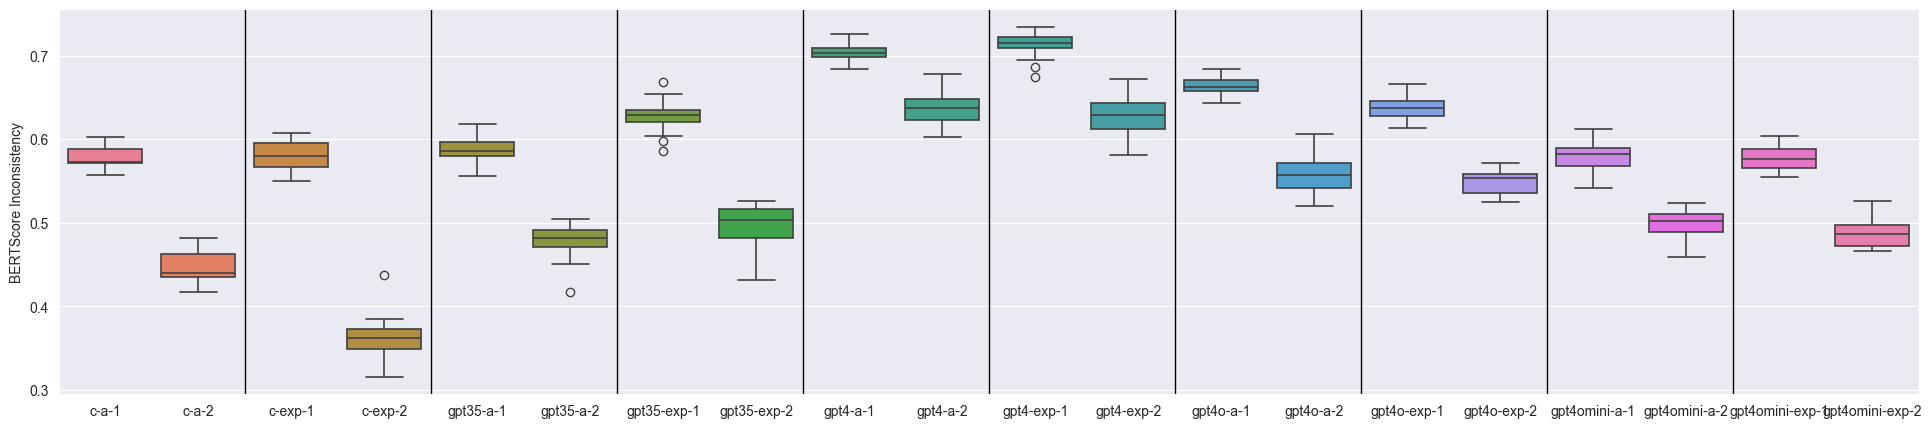

In [84]:
plt.figure(figsize=(24, 5))
sns.boxplot(everything_free, linewidth=1.2)
plt.ylabel('BERTScore Inconsistency')
plt.title('')
for i in [1.5, 3.5, 5.5, 7.5, 9.5, 11.5, 13.5, 15.5, 17.5]:
    plt.axvline(x=i, color='black', linewidth=1)

In [85]:
explicit_comps_free = everything_free[['c-exp-1', 'c-exp-2', 'gpt35-exp-1', 'gpt35-exp-2', 'gpt4-exp-1', 'gpt4-exp-2', 'gpt4o-exp-1', 'gpt4o-exp-2', 'gpt4omini-exp-1', 'gpt4omini-exp-2']]

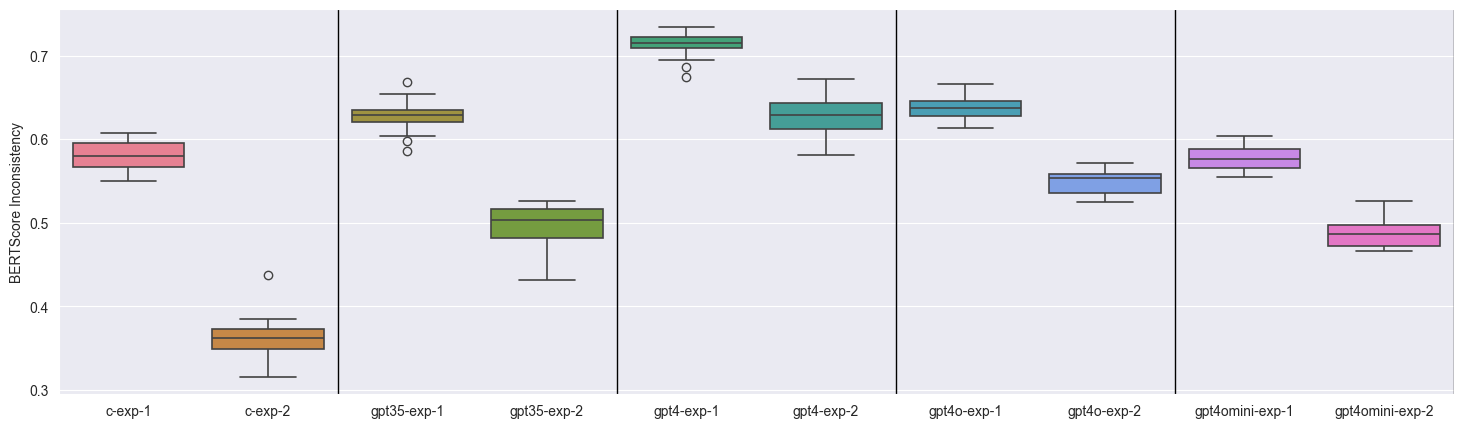

In [86]:
plt.figure(figsize=(18, 5))
sns.boxplot(explicit_comps_free, linewidth=1.2)
plt.ylabel('BERTScore Inconsistency')
plt.title('')
for i in [1.5, 3.5, 5.5, 7.5, 9.5]:
    plt.axvline(x=i, color='black', linewidth=1)

In [87]:
anon_comps_free = everything_free[['c-a-1', 'c-a-2', 'gpt35-a-1', 'gpt35-a-2', 'gpt4-a-1', 'gpt4-a-2', 'gpt4o-a-1', 'gpt4o-a-2', 'gpt4omini-a-1', 'gpt4omini-a-2']]

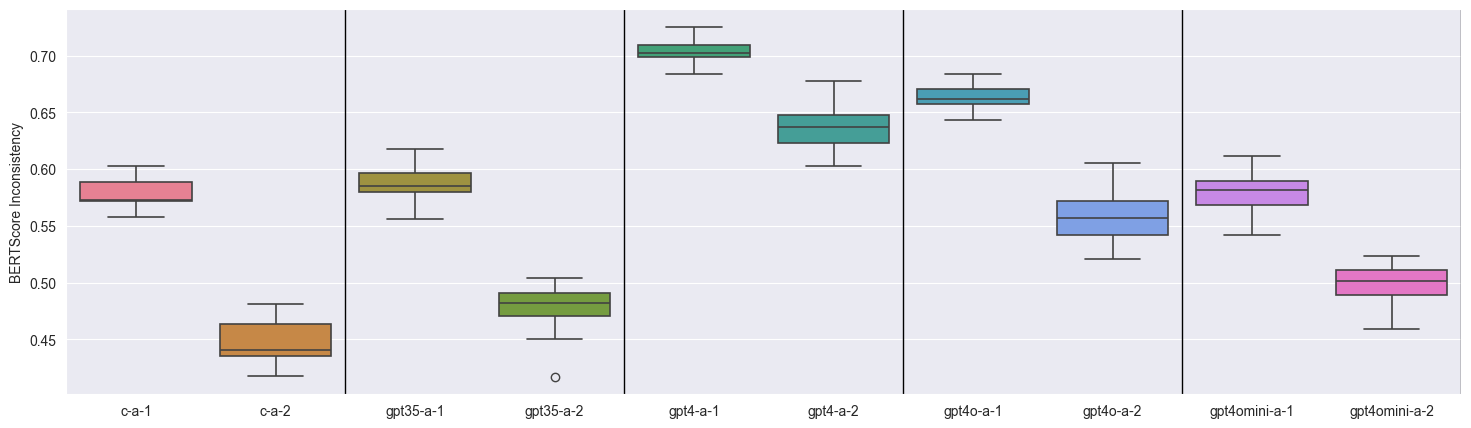

In [88]:
plt.figure(figsize=(18, 5))
sns.boxplot(anon_comps_free, linewidth=1.2)
plt.ylabel('BERTScore Inconsistency')
plt.title('')
for i in [1.5, 3.5, 5.5, 7.5, 9.5]:
    plt.axvline(x=i, color='black', linewidth=1)

In [89]:
move1_comps_free = everything_free[['c-a-1', 'c-exp-1', 'gpt35-a-1', 'gpt35-exp-1', 'gpt4-a-1', 'gpt4-exp-1', 'gpt4o-a-1', 'gpt4o-exp-1', 'gpt4omini-a-1', 'gpt4omini-exp-1']]

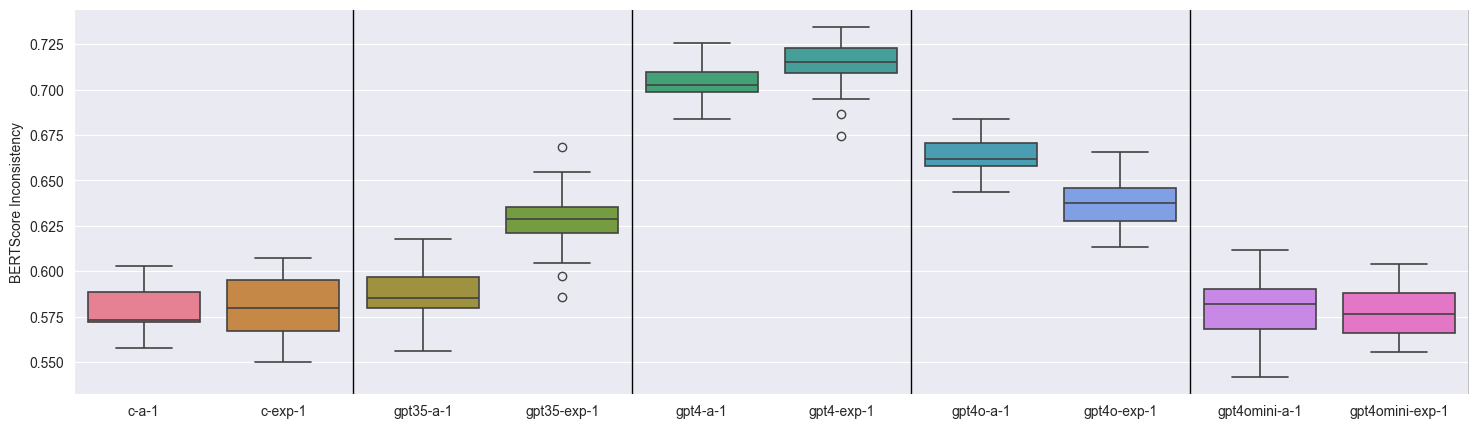

In [90]:
plt.figure(figsize=(18, 5))
sns.boxplot(move1_comps_free, linewidth=1.2)
plt.ylabel('BERTScore Inconsistency')
plt.title('')
for i in [1.5, 3.5, 5.5, 7.5, 9.5]:
    plt.axvline(x=i, color='black', linewidth=1)

In [91]:
move2_comps_free = everything_free[['c-a-2', 'c-exp-2', 'gpt35-a-2', 'gpt35-exp-2', 'gpt4-a-2', 'gpt4-exp-2', 'gpt4o-a-2', 'gpt4o-exp-2', 'gpt4omini-a-2', 'gpt4omini-exp-2']]

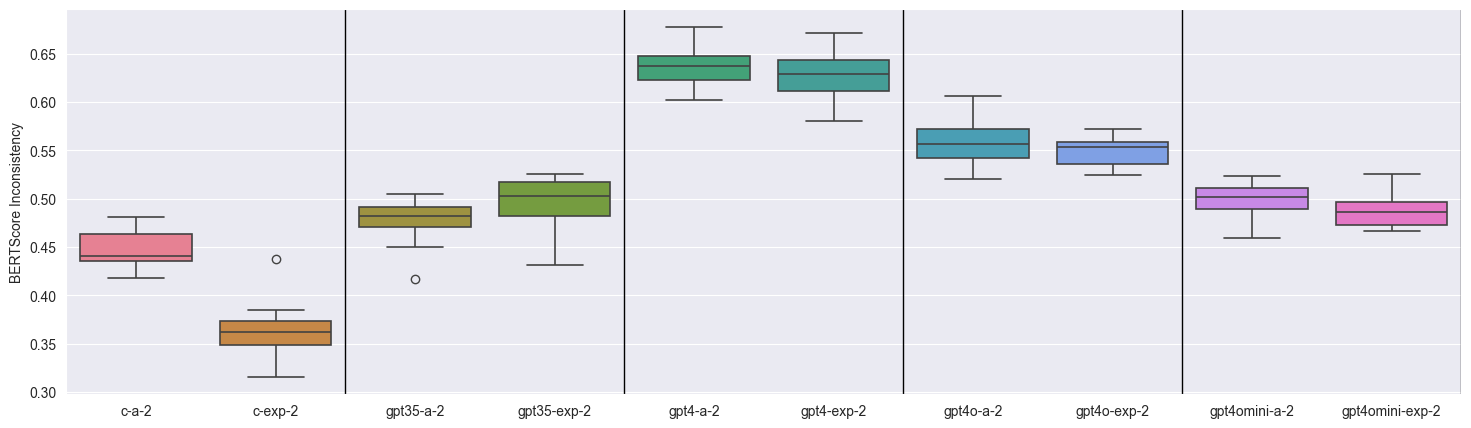

In [92]:
plt.figure(figsize=(18, 5))
sns.boxplot(move2_comps_free, linewidth=1.2)
plt.ylabel('BERTScore Inconsistency')
plt.title('')
for i in [1.5, 3.5, 5.5, 7.5, 9.5]:
    plt.axvline(x=i, color='black', linewidth=1)

### Claude 3.5 sonnet anonymous lines

In [127]:
everything_free[['c-a-1', 'c-a-2']].T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
c-a-1,0.602840,0.587563,0.585428,0.570553,0.577045,0.578063,0.572134,0.571809,0.597133,0.573423,0.568850,0.572274,0.602568,0.557478,0.571769,0.572580,0.572082,0.572222,0.590955,0.597169
c-a-2,0.472521,0.474181,0.436464,0.432218,0.436403,0.475122,0.460063,0.438261,0.455942,0.437289,0.460809,0.442206,0.425985,0.428080,0.433648,0.417571,0.436370,0.481574,0.459611,0.470091


In [136]:
purples = sns.color_palette("Purples", 20) # Adjust the number 2 to the number of lines you have

In [12]:
def plot_lines(df, label_name, cols, colors, main_color, plot, first=False):

    interested = df[cols]
    interested.columns = ['Move 1', 'Move 2']

    for i in range(20):
        sns.lineplot(data=interested.T[i],
            lw=1,
            alpha=0.5,
            linestyle='--',
            color=colors[i],
            ax=plot)
    
    mean_line = sns.lineplot(data=[interested['Move 1'].mean(), interested['Move 2'].mean()],
        linewidth=3,
        linestyle='-',
        color=main_color,
        ax=plot)
    
    legend_line = Line2D([0], [0], color=main_color, lw=3)
    plot.legend([legend_line], [label_name], loc='upper right')
    # plt.xlabel('Move 1 to Move 2')
    if first:
        plot.set_ylabel('BERTScore Inconsistency')
    else:
        plot.set_ylabel('')

NameError: name 'label_name' is not defined

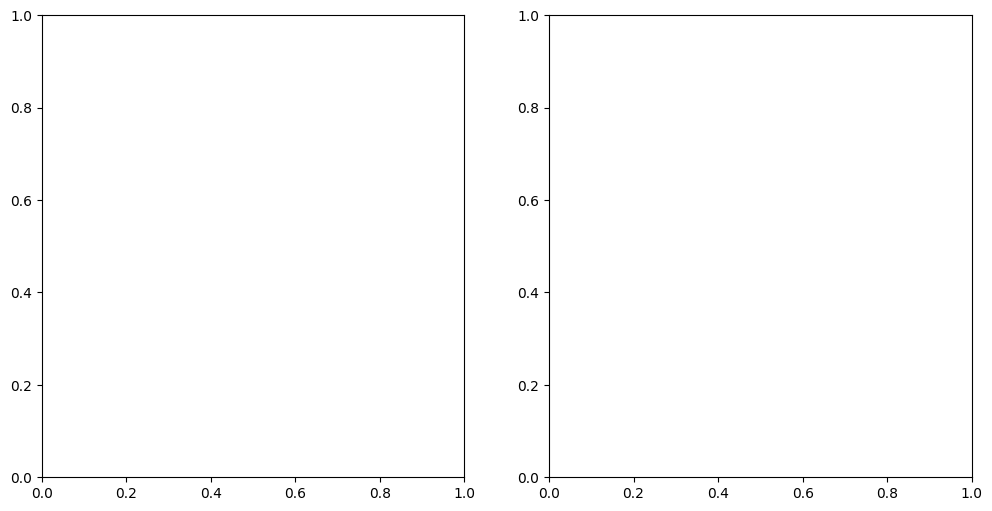

In [15]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(12, 6))
fig.suptitle('')
for ax in axes:
    ax.yaxis.set_tick_params(labelleft=True)
# Define your custom color palette
oranges = [
    '#FFA07A', '#FF8C00', '#FFA500', '#FF4500', '#FF6347',
    '#FF7F50', '#FF6A00', '#FF5E13', '#FF4C00', '#FF3F00',
    '#FF2E00', '#FF2300', '#FF1A00', '#FF1200', '#FF0C00',
    '#FF5800', '#FF5100', '#FF8C69', '#FFA54F', '#FF7600'
]

main_color = '#FF6719'

cols_a =  ['c-a-1', 'c-a-2']
cols_exp = ['c-exp-1', 'c-exp-2']

label_name_anon = 'Claude 3.5 Sonnet - Anonymous'
label_name_exp = 'Claude 3.5 Sonnet - Explicit'

plot_lines(everything_free, label_name, cols_a, oranges, main_color, axes[0])

plot_lines(everything_free, label_name, cols_exp, oranges, main_color, axes[1])



In [16]:
purples = [
    "#800080",  # Purple
    "#8A2BE2",  # Blue Violet
    "#9370DB",  # Medium Purple
    "#7B68EE",  # Medium Slate Blue
    "#6A5ACD",  # Slate Blue
    "#483D8B",  # Dark Slate Blue
    "#9400D3",  # Dark Violet
    "#9932CC",  # Dark Orchid
    "#BA55D3",  # Medium Orchid
    "#DA70D6",  # Orchid
    "#D8BFD8",  # Thistle
    "#DDA0DD",  # Plum
    "#EE82EE",  # Violet
    "#FF00FF",  # Fuchsia
    "#C71585",  # Medium Violet Red
    "#DB7093",  # Pale Violet Red
    "#E6E6FA",  # Lavender
    "#8B008B",  # Dark Magenta
    "#FF1493",  # Deep Pink
    "#FFB6C1"   # Light Pink
]

blacks = [
    "#000000",  # Black
    "#0C0C0C",  # Almost Black
    "#1C1C1C",  # Dark Charcoal
    "#2B2B2B",  # Dark Gray
    "#3D3D3D",  # Jet Black
    "#4E4E4E",  # Onyx
    "#5F5F5F",  # Dim Gray
    "#6F6F6F",  # Dark Slate Gray
    "#7F7F7F",  # Gray
    "#8F8F8F",  # Slate Gray
    "#9F9F9F",  # Light Charcoal
    "#AFAFAF",  # Silver
    "#BFBFBF",  # Gray Web
    "#CFCFCF",  # Gray X11
    "#DFDFDF",  # Gainsboro
    "#EFEFEF",  # Light Gray
    "#F7F7F7",  # White Smoke
    "#080808",  # Rich Black
    "#1A1A1A",  # Eerie Black
    "#292929",  # Outer Space
]

blues = [
    "#0000FF",  # Blue
    "#0000CD",  # Medium Blue
    "#1E90FF",  # Dodger Blue
    "#6495ED",  # Cornflower Blue
    "#4169E1",  # Royal Blue
    "#4682B4",  # Steel Blue
    "#5F9EA0",  # Cadet Blue
    "#00BFFF",  # Deep Sky Blue
    "#87CEEB",  # Sky Blue
    "#87CEFA",  # Light Sky Blue
    "#ADD8E6",  # Light Blue
    "#B0E0E6",  # Powder Blue
    "#AFEEEE",  # Pale Turquoise
    "#48D1CC",  # Medium Turquoise
    "#40E0D0",  # Turquoise
    "#00CED1",  # Dark Turquoise
    "#20B2AA",  # Light Sea Green
    "#5F9EA0",  # Cadet Blue
    "#4682B4",  # Steel Blue
    "#1E90FF"   # Dodger Blue
]



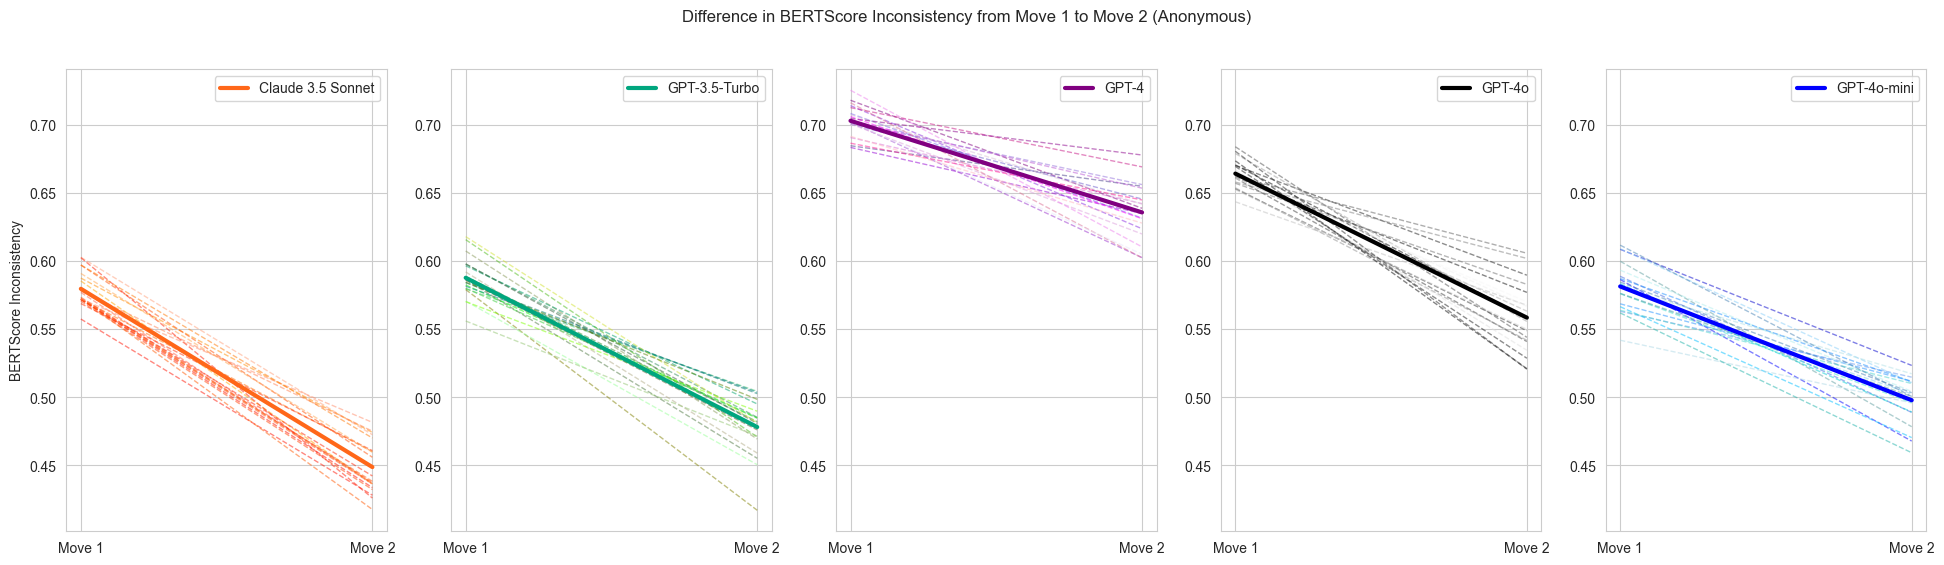

In [131]:
fig, axes = plt.subplots(1, 5, sharey=True, figsize=(24, 6))
fig.suptitle('Difference in BERTScore Inconsistency from Move 1 to Move 2 (Anonymous)')
for i, ax in enumerate(axes):
    ax.yaxis.set_tick_params(labelleft=True)

plot_lines(everything_free, 'Claude 3.5 Sonnet', ['c-a-1', 'c-a-2'], oranges, '#FF6719', axes[0], first=True)

plot_lines(everything_free, 'GPT-3.5-Turbo', ['gpt35-a-1', 'gpt35-a-2'], greens, '#00A67E', axes[1])

plot_lines(everything_free, 'GPT-4', ['gpt4-a-1', 'gpt4-a-2'], purples, '#800080', axes[2])

plot_lines(everything_free, 'GPT-4o', ['gpt4o-a-1', 'gpt4o-a-2'], blacks, '#000000', axes[3])

plot_lines(everything_free, 'GPT-4o-mini', ['gpt4omini-a-1', 'gpt4omini-a-2'], blues, '#0000FF', axes[4])

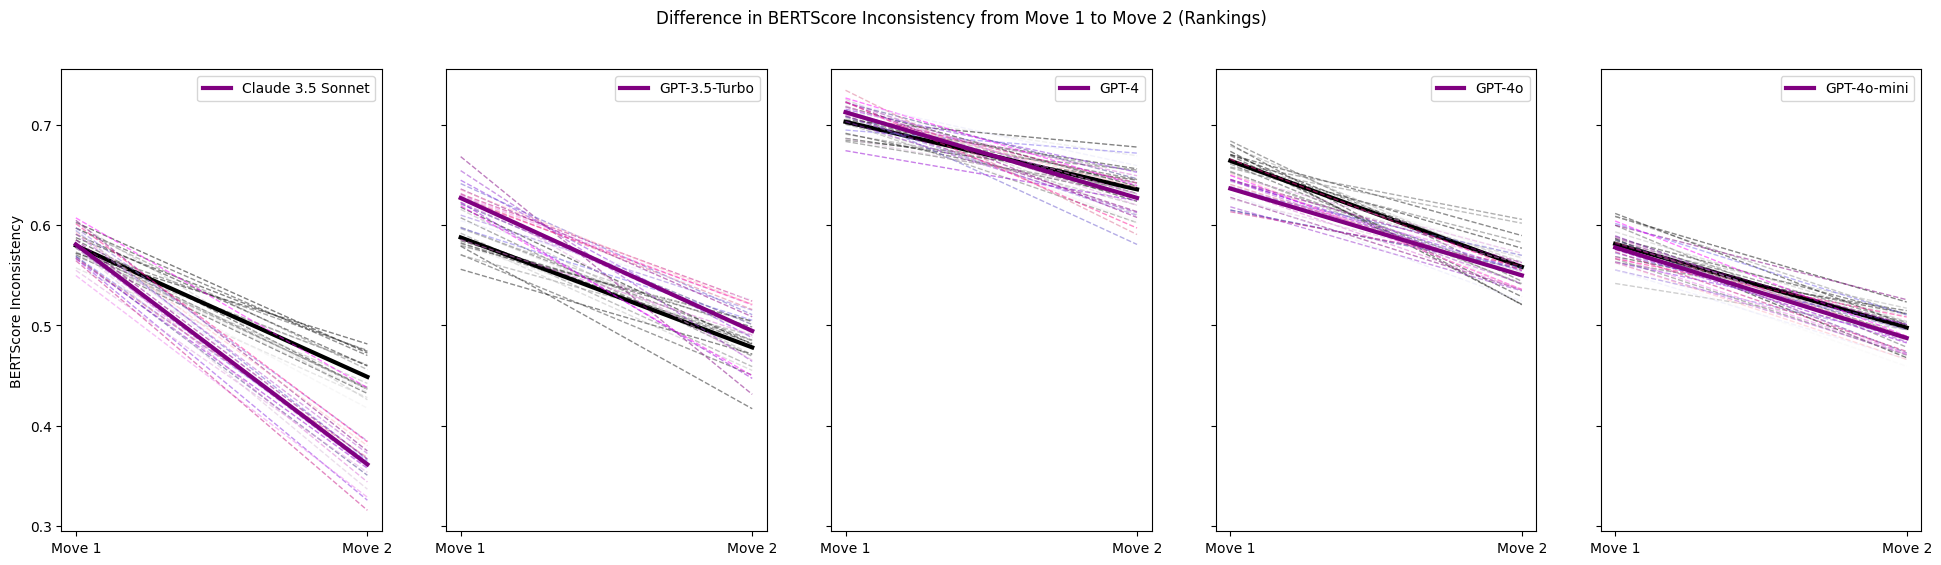

In [71]:
fig, axes = plt.subplots(1, 5, sharey=True, figsize=(24, 6))
fig.suptitle('Difference in BERTScore Inconsistency from Move 1 to Move 2 (Rankings)')
# for i, ax in enumerate(axes):
#     ax.yaxis.set_tick_params(labelleft=True)

plot_lines(everything_free, 'Claude 3.5 Sonnet', ['c-a-1', 'c-a-2'], blacks, '#000000', axes[0], first=True)

plot_lines(everything_free, 'GPT-3.5-Turbo', ['gpt35-a-1', 'gpt35-a-2'], blacks, '#000000', axes[1])

plot_lines(everything_free, 'GPT-4', ['gpt4-a-1', 'gpt4-a-2'], blacks, '#000000', axes[2])

plot_lines(everything_free, 'GPT-4o', ['gpt4o-a-1', 'gpt4o-a-2'], blacks, '#000000', axes[3])

plot_lines(everything_free, 'GPT-4o-mini', ['gpt4omini-a-1', 'gpt4omini-a-2'], blacks, '#000000', axes[4])

plot_lines(everything_free, 'Claude 3.5 Sonnet', ['c-exp-1', 'c-exp-2'], purples, '#800080', axes[0], first=True)

plot_lines(everything_free, 'GPT-3.5-Turbo', ['gpt35-exp-1', 'gpt35-exp-2'], purples, '#800080', axes[1])

plot_lines(everything_free, 'GPT-4', ['gpt4-exp-1', 'gpt4-exp-2'], purples, '#800080', axes[2])

plot_lines(everything_free, 'GPT-4o', ['gpt4o-exp-1', 'gpt4o-exp-2'], purples, '#800080', axes[3])

plot_lines(everything_free, 'GPT-4o-mini', ['gpt4omini-exp-1', 'gpt4omini-exp-2'], purples, '#800080', axes[4])

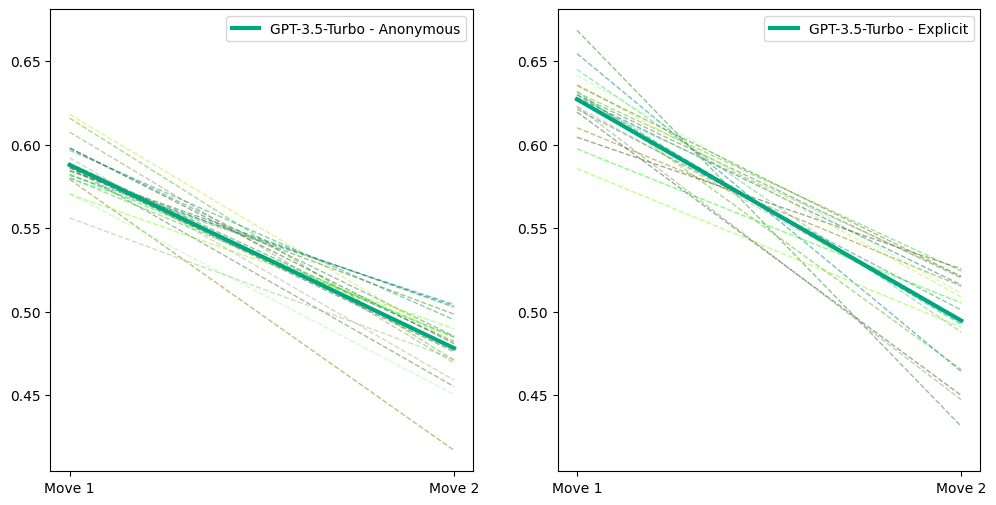

In [20]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(12, 6))
fig.suptitle('')
for ax in axes:
    ax.yaxis.set_tick_params(labelleft=True)
# Define your custom color palette
greens = [
    "#228B22",  # Forest Green
    "#50C878",  # Emerald
    "#808000",  # Olive
    "#00FF00",  # Lime
    "#98FF98",  # Mint
    "#2E8B57",  # Sea Green
    "#8A9A5B",  # Moss Green
    "#008080",  # Teal
    "#B2AC88",  # Sage
    "#7FFF00",  # Chartreuse
    "#00A36C",  # Jade
    "#4CBB17",  # Kelly Green
    "#4F7942",  # Fern Green
    "#355E3B",  # Hunter Green
    "#33CC33",  # Shamrock Green
    "#01796F",  # Pine Green
    "#4B5320",  # Army Green
    "#D1E231",  # Pear
    "#93C572",  # Pistachio
    "#568203",  # Avocado
    "#00A67E"   # ChatGPT Green
]
main_color = '#00A67E'

cols_a =  ['gpt35-a-1', 'gpt35-a-2']
cols_exp = ['gpt35-exp-1', 'gpt35-exp-2']

label_name_anon = 'GPT-3.5-Turbo - Anonymous'
label_name_exp = 'GPT-3.5-Turbo - Explicit'

plot_lines(everything_free, label_name_anon, cols_a, greens, main_color, axes[0])

plot_lines(everything_free, label_name_exp, cols_exp, greens, main_color, axes[1])



# RANK Score FIXED

In [21]:
def get_means(path, fixed):
    means = [[], []]

    for i in range(1, 21):
        loaded_ranks = np.load(f'{path}/run{i}{fixed}/run{i}_ranks.npz')
        m1 = loaded_ranks['kendall_move1']
        m2 = loaded_ranks['kendall_move2']
        mean_m1 = m1.mean()
        mean_m2 = m2.mean()

        means[0].append(mean_m1)
        means[1].append(mean_m2)

    return means

In [22]:
claude_anon = get_means('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/claude35sonnet-rank-False-20-1.0/main', '_fixed') 
claude_exp = get_means('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/claude35sonnet-rank-True-20-1.0/main', '')
gpt35_anon = get_means('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt3.5turbo-rank-False-20-1.0/main', '_fixed')
gpt35_exp = get_means('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt3.5turbo-rank-True-20-1.0/main', '')
gpt4_anon = get_means('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt4-rank-False-20-1.0/main', '_fixed')
gpt4_exp = get_means('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt4-rank-True-20-1.0/main', '')
gpt4o_anon = get_means('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt4o-rank-False-20-1.0/main', '')
gpt4o_exp = get_means('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt4o-rank-True-20-1.0/main', '')
gpt4omini_anon = get_means('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt4omini-rank-False-20-1.0/main', '')
gpt4omini_exp = get_means('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt4omini-rank-True-20-1.0/main', '')

In [23]:
everything_rank = pd.DataFrame([
    claude_anon[0], claude_anon[1],
    claude_exp[0], claude_exp[1],
    gpt35_anon[0], gpt35_anon[1],
    gpt35_exp[0], gpt35_exp[1],
    gpt4_anon[0], gpt4_anon[1],
    gpt4_exp[0], gpt4_exp[1],
    gpt4o_anon[0], gpt4o_anon[1],
    gpt4o_exp[0], gpt4o_exp[1],
    gpt4omini_anon[0], gpt4omini_anon[1],
    gpt4omini_exp[0], gpt4omini_exp[1],

]).T

everything_rank.columns = [
    'c-a-1', 'c-a-2',
    'c-exp-1', 'c-exp-2',
    'gpt35-a-1', 'gpt35-a-2',
    'gpt35-exp-1', 'gpt35-exp-2',
    'gpt4-a-1', 'gpt4-a-2',
    'gpt4-exp-1', 'gpt4-exp-2',
    'gpt4o-a-1', 'gpt4o-a-2',
    'gpt4o-exp-1', 'gpt4o-exp-2',
    'gpt4omini-a-1', 'gpt4omini-a-2',
    'gpt4omini-exp-1', 'gpt4omini-exp-2',
]

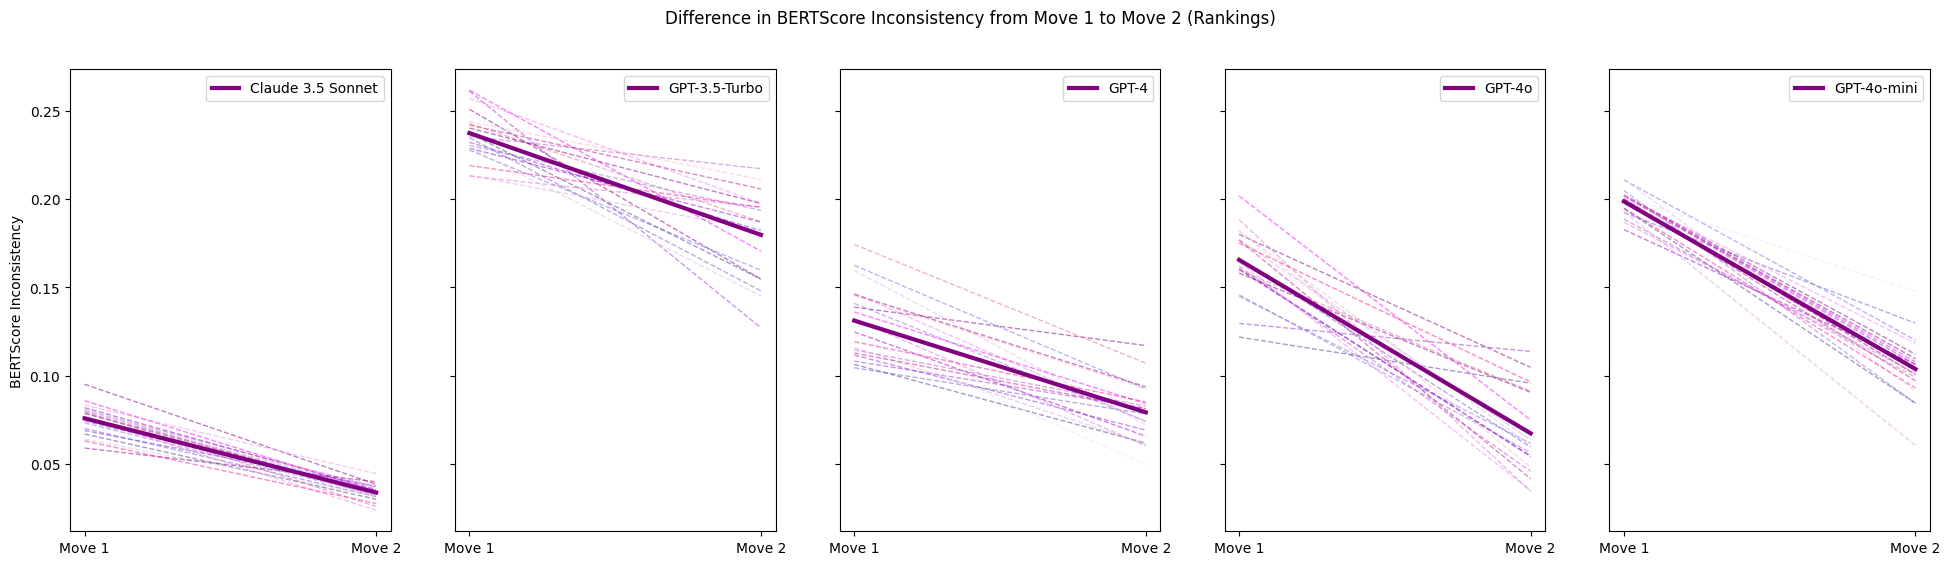

In [73]:
fig, axes = plt.subplots(1, 5, sharey=True, figsize=(24, 6))
fig.suptitle('Difference in BERTScore Inconsistency from Move 1 to Move 2 (Rankings)')
# for i, ax in enumerate(axes):
#     ax.yaxis.set_tick_params(labelleft=True)

# plot_lines(everything_rank, 'Claude 3.5 Sonnet', ['c-a-1', 'c-a-2'], blacks, '#000000', axes[0][0], first=True)

# plot_lines(everything_rank, 'GPT-3.5-Turbo', ['gpt35-a-1', 'gpt35-a-2'], blacks, '#000000', axes[0][1])

# plot_lines(everything_rank, 'GPT-4', ['gpt4-a-1', 'gpt4-a-2'], blacks, '#000000', axes[0][2])

# plot_lines(everything_rank, 'GPT-4o', ['gpt4o-a-1', 'gpt4o-a-2'], blacks, '#000000', axes[0][3])

# plot_lines(everything_rank, 'GPT-4o-mini', ['gpt4omini-a-1', 'gpt4omini-a-2'], blacks, '#000000', axes[0][4])

plot_lines(everything_rank, 'Claude 3.5 Sonnet', ['c-exp-1', 'c-exp-2'], purples, '#800080', axes[0], first=True)

plot_lines(everything_rank, 'GPT-3.5-Turbo', ['gpt35-exp-1', 'gpt35-exp-2'], purples, '#800080', axes[1])

plot_lines(everything_rank, 'GPT-4', ['gpt4-exp-1', 'gpt4-exp-2'], purples, '#800080', axes[2])

plot_lines(everything_rank, 'GPT-4o', ['gpt4o-exp-1', 'gpt4o-exp-2'], purples, '#800080', axes[3])

plot_lines(everything_rank, 'GPT-4o-mini', ['gpt4omini-exp-1', 'gpt4omini-exp-2'], purples, '#800080', axes[4])

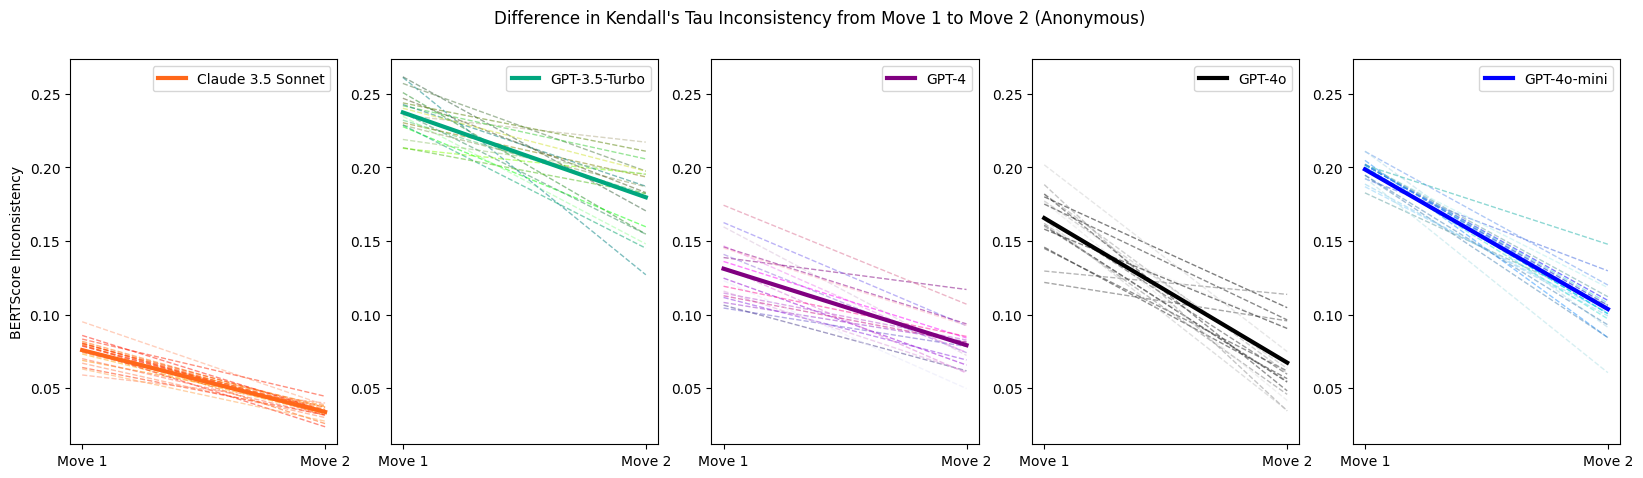

In [63]:
fig, axes = plt.subplots(1, 5, sharey=True, figsize=(20, 5))
fig.suptitle('Difference in Kendall\'s Tau Inconsistency from Move 1 to Move 2 (Anonymous)')
# axes.yaxis.set_tick_params(labelleft=True)
for i, ax in enumerate(axes):
    ax.yaxis.set_tick_params(labelleft=True)

plot_lines(everything_rank, 'Claude 3.5 Sonnet', ['c-exp-1', 'c-exp-2'], oranges, '#FF6719', axes[0], first=True)

plot_lines(everything_rank, 'GPT-3.5-Turbo', ['gpt35-exp-1', 'gpt35-exp-2'], greens, '#00A67E', axes[1])

plot_lines(everything_rank, 'GPT-4', ['gpt4-exp-1', 'gpt4-exp-2'], purples, '#800080', axes[2])

plot_lines(everything_rank, 'GPT-4o', ['gpt4o-exp-1', 'gpt4o-exp-2'], blacks, '#000000', axes[3])

plot_lines(everything_rank, 'GPT-4o-mini', ['gpt4omini-exp-1', 'gpt4omini-exp-2'], blues, '#0000FF', axes[4])

legend_line_o = Line2D([0], [0], color='#FF6719', lw=3)
legend_line_g = Line2D([0], [0], color='#00A67E', lw=3)
legend_line_p = Line2D([0], [0], color='#800080', lw=3)
legend_line_black = Line2D([0], [0], color='#000000', lw=3)
legend_line_blue = Line2D([0], [0], color='#0000FF', lw=3)
# axes.legend([legend_line_o, legend_line_g, legend_line_p, legend_line_black, legend_line_blue], ['Claude 3.5 Sonnet', 'GPT-3.5-Turbo', 'GPT-4', 'GPT-4o', 'GPT-4o-mini'], loc='upper right')
# axes.set_ylabel('Kendall\'s Tau Inconsistency Score')


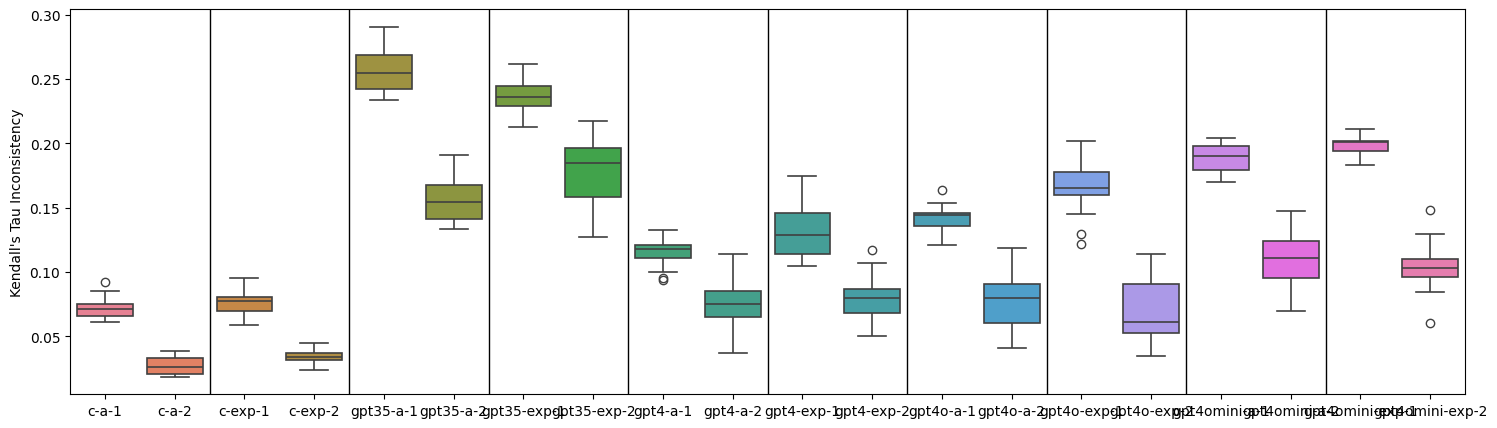

In [74]:
plt.figure(figsize=(18, 5))
sns.boxplot(everything_rank, linewidth=1.2)
plt.ylabel('Kendall\'s Tau Inconsistency')
plt.title('')
for i in [1.5, 3.5, 5.5, 7.5, 9.5, 11.5, 13.5, 15.5, 17.5]:
    plt.axvline(x=i, color='black', linewidth=1)

In [66]:
explicit_comps = everything_rank[['c-exp-1', 'c-exp-2', 'gpt35-exp-1', 'gpt35-exp-2', 'gpt4-exp-1', 'gpt4-exp-2', 'gpt4o-exp-1', 'gpt4o-exp-2', 'gpt4omini-exp-1', 'gpt4omini-exp-2']]

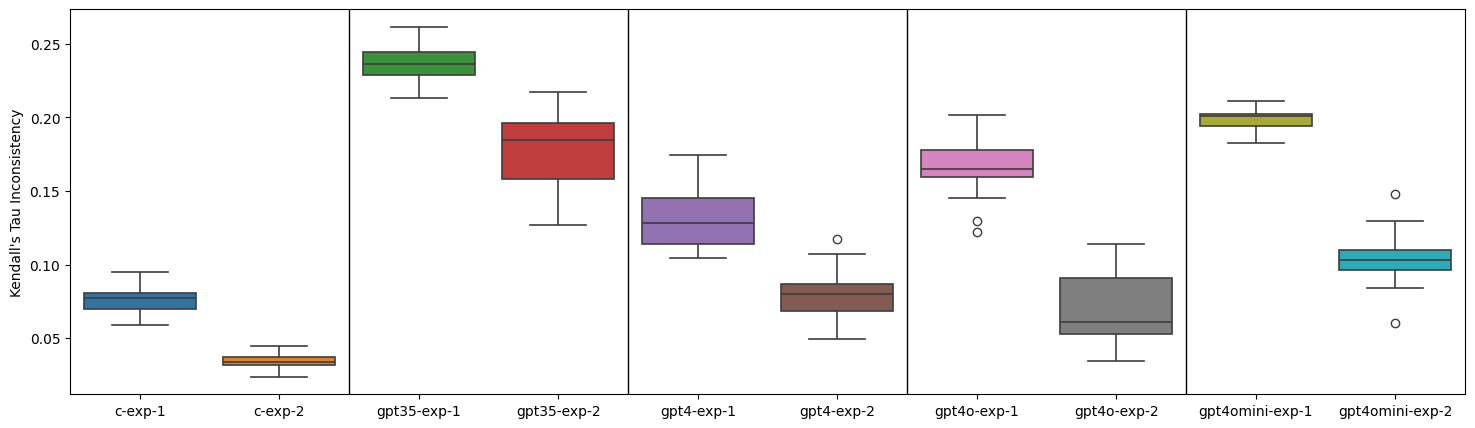

In [64]:
plt.figure(figsize=(18, 5))
sns.boxplot(explicit_comps, linewidth=1.2)
plt.ylabel('Kendall\'s Tau Inconsistency')
plt.title('')
for i in [1.5, 3.5, 5.5, 7.5]:
    plt.axvline(x=i, color='black', linewidth=1)

In [75]:
anon_comps = everything_rank[['c-a-1', 'c-a-2', 'gpt35-a-1', 'gpt35-a-2', 'gpt4-a-1', 'gpt4-a-2', 'gpt4o-a-1', 'gpt4o-a-2', 'gpt4omini-a-1', 'gpt4omini-a-2']]

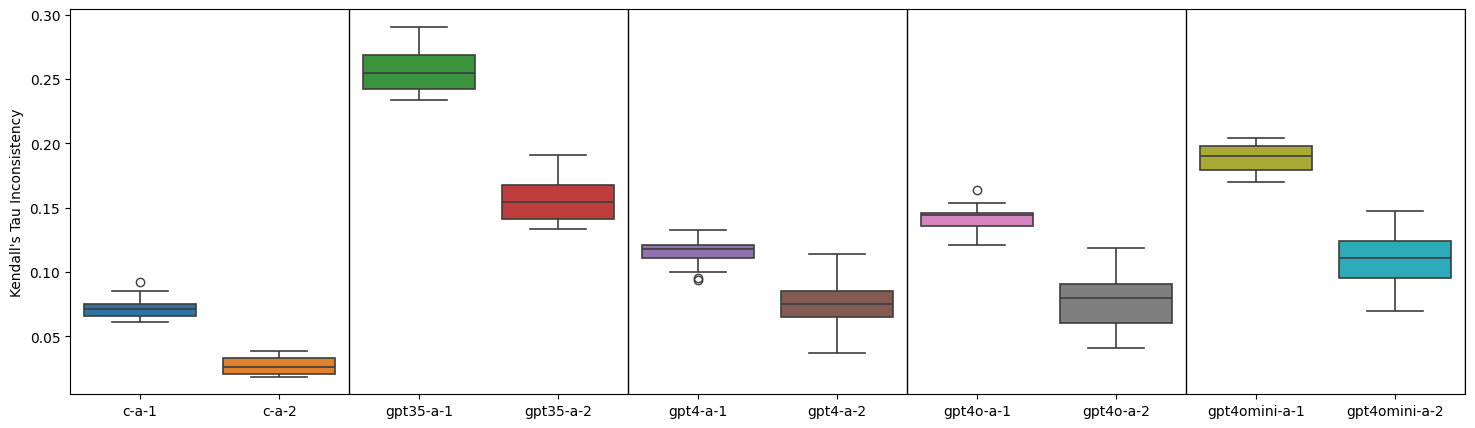

In [76]:
plt.figure(figsize=(18, 5))
sns.boxplot(anon_comps, linewidth=1.2)
plt.ylabel('Kendall\'s Tau Inconsistency')
plt.title('')
for i in [1.5, 3.5, 5.5, 7.5, 9.5]:
    plt.axvline(x=i, color='black', linewidth=1)

In [56]:
move1_comps = everything[['c-a-1', 'c-exp-1', 'gpt35-a-1', 'gpt35-exp-1', 'gpt4-a-1', 'gpt4-exp-1', 'gpt4o-a-1', 'gpt4o-exp-1', 'gpt4omini-a-1', 'gpt4omini-exp-1']]

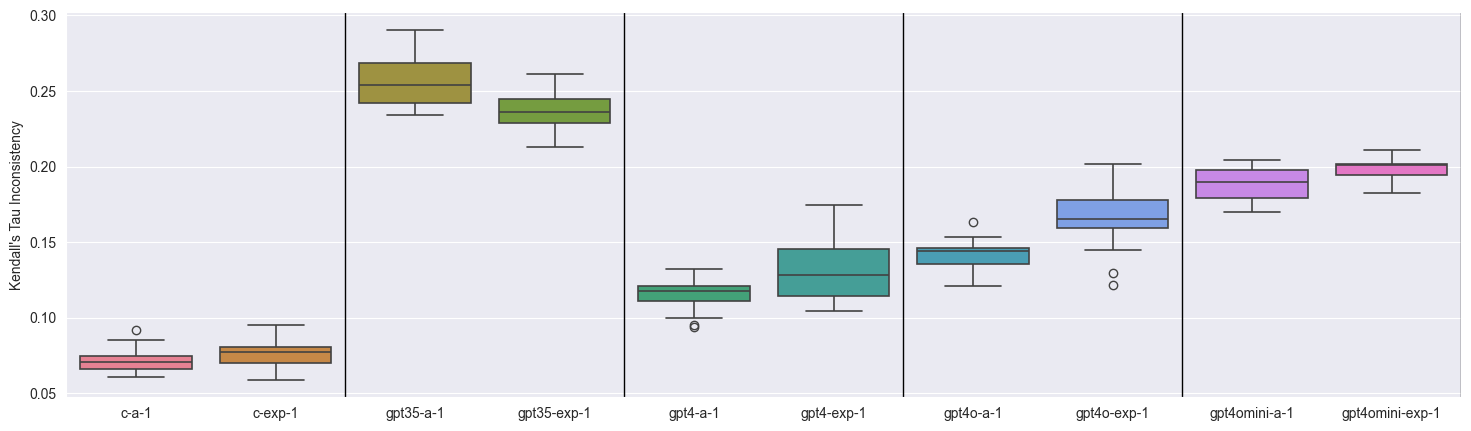

In [57]:
plt.figure(figsize=(18, 5))
sns.boxplot(move1_comps, linewidth=1.2)
plt.ylabel('Kendall\'s Tau Inconsistency')
plt.title('')
for i in [1.5, 3.5, 5.5, 7.5, 9.5]:
    plt.axvline(x=i, color='black', linewidth=1)

In [59]:
move2_comps = everything[['c-a-2', 'c-exp-2', 'gpt35-a-2', 'gpt35-exp-2', 'gpt4-a-2', 'gpt4-exp-2', 'gpt4o-a-2', 'gpt4o-exp-2', 'gpt4omini-a-2', 'gpt4omini-exp-2']]

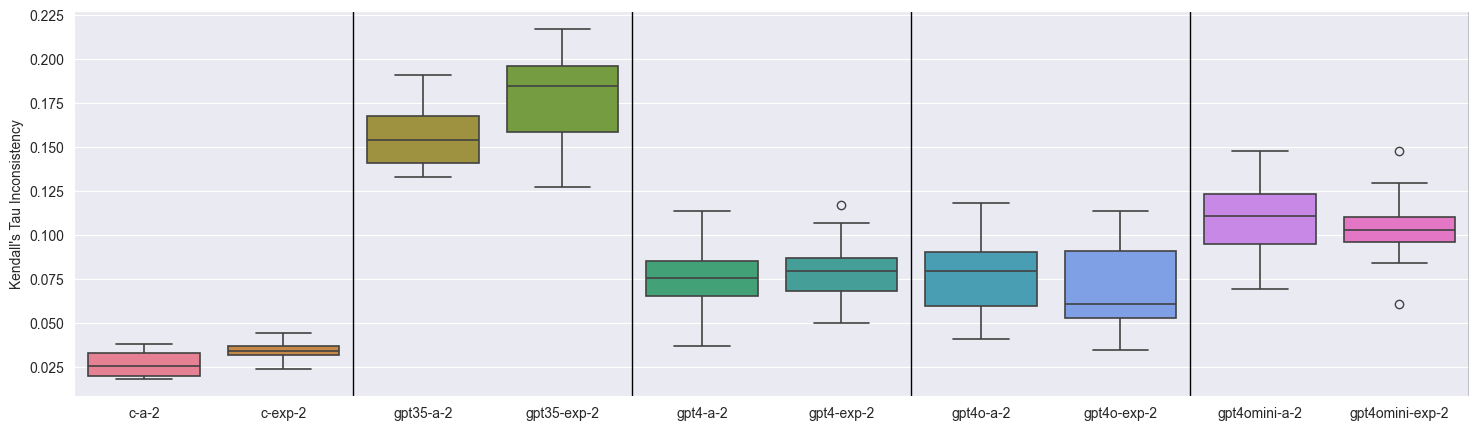

In [60]:
plt.figure(figsize=(18, 5))
sns.boxplot(move2_comps, linewidth=1.2)
plt.ylabel('Kendall\'s Tau Inconsistency')
plt.title('')
for i in [1.5, 3.5, 5.5, 7.5, 9.5]:
    plt.axvline(x=i, color='black', linewidth=1)

In [80]:
everything_free

,c-a-1,c-a-2,c-exp-1,c-exp-2,gpt35-a-1,gpt35-a-2,gpt35-exp-1,gpt35-exp-2,gpt4-a-1,gpt4-a-2,gpt4-exp-1,gpt4-exp-2,gpt4o-a-1,gpt4o-a-2,gpt4o-exp-1,gpt4o-exp-2,gpt4omini-a-1,gpt4omini-a-2,gpt4omini-exp-1,gpt4omini-exp-2
0,0.602840,0.472521,0.604870,0.374881,0.588776,0.482067,0.668411,0.431322,0.718185,0.638835,0.708973,0.613509,0.670693,0.558443,0.627771,0.535501,0.586507,0.467827,0.600037,0.525729
1,0.587563,0.474181,0.566833,0.325706,0.579724,0.504388,0.644892,0.487676,0.714248,0.623808,0.715615,0.652814,0.661521,0.577067,0.644566,0.554760,0.608716,0.523398,0.563083,0.501373
2,0.585428,0.436464,0.597583,0.384739,0.579137,0.416993,0.610080,0.515286,0.701615,0.656255,0.708567,0.609741,0.670286,0.589686,0.638673,0.554255,0.568662,0.511796,0.555371,0.488374
3,0.570553,0.432218,0.569157,0.364641,0.582504,0.484922,0.597384,0.505214,0.708453,0.631635,0.694918,0.671895,0.653112,0.548878,0.615033,0.557767,0.563158,0.514783,0.601819,0.510678
4,0.577045,0.436403,0.594787,0.366239,0.570683,0.450486,0.641493,0.510783,0.700711,0.645645,0.714483,0.580840,0.661162,0.540933,0.635423,0.569952,0.588888,0.488874,0.572453,0.495663
5,0.578063,0.475122,0.568635,0.350610,0.597853,0.485270,0.621257,0.500956,0.684785,0.655024,0.722239,0.646322,0.684041,0.544038,0.615158,0.556302,0.584658,0.503368,0.585634,0.472694
6,0.572134,0.460063,0.567066,0.357607,0.607458,0.469375,0.622818,0.447220,0.683548,0.635008,0.674338,0.624486,0.662313,0.605822,0.645738,0.548582,0.599945,0.478393,0.575807,0.482602
7,0.571809,0.438261,0.577859,0.359131,0.581588,0.503727,0.654438,0.464176,0.702223,0.602589,0.703435,0.612539,0.657209,0.582935,0.618362,0.534552,0.566564,0.470391,0.589535,0.483455
8,0.597133,0.455942,0.591395,0.372346,0.592081,0.458995,0.622869,0.494315,0.703031,0.653624,0.723219,0.626170,0.658057,0.601994,0.644896,0.541582,0.576373,0.502522,0.562928,0.470986
9,0.573423,0.437289,0.581566,0.343944,0.570248,0.489775,0.585651,0.490591,0.690815,0.642268,0.709846,0.649356,0.653855,0.541858,0.636232,0.535494,0.609102,0.510708,0.588383,0.471221


In [85]:
overall_mean = (everything_free.mean()).mean()

In [89]:
len(np.load('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt4o-free-False-20-1.0/main/run1/run1_berts.npz')['move1'])

190

In [136]:
def get_all_scores(model, loc, fixed=False):
    scores = []

    paths = [
        f'/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/{model}-{loc}-False-20-1.0/main',
        f'/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt4o-{loc}-True-20-1.0/main'
    ]

    if loc == 'free':
        bert_or_rank = 'berts'
    else:
        bert_or_rank = 'ranks'
    
    for path in paths:
        if fixed:
            if 'False' in path:
                fix = '_fixed'
            else:
                fix = ''
        else:
            fix = ''
        for i in range(1, 21):
            curr_berts = np.load(f'{path}/run{i}{fix}/run{i}_{bert_or_rank}.npz')
            m1 = curr_berts['move1']
            m2 = curr_berts['move2']
            scores.extend(m1)
            scores.extend(m2)
            
    return scores

In [137]:
def get_count(model, loc, baseline, fixed=False):
    assert loc in ['free', 'rank']

    paths = [
        f'/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/{model}-{loc}-False-20-1.0/main',
        f'/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt4o-{loc}-True-20-1.0/main'
    ]

    if loc == 'free':
        bert_or_rank = 'berts'
    else:
        bert_or_rank = 'ranks'


    count = 0

    for path in paths:
        if fixed:
            if 'False' in path:
                fix = '_fixed'
            else:
                fix = ''
        else:
            fix = ''
        for i in range(1, 21):
            curr_berts = np.load(f'{path}/run{i}{fix}/run{i}_{bert_or_rank}.npz')
            m1 = curr_berts['move1']
            m2 = curr_berts['move2']
            count += (np.sum(m1 > baseline) + np.sum(m2 > baseline))
    
    return count

In [138]:
mini_scores = get_all_scores('gpt4omini', 'free')
gpt4o_scores = get_all_scores('gpt4o', 'free')
gpt35_scores = get_all_scores('gpt3.5turbo', 'free', fixed=True)
claude_scores = get_all_scores('claude35sonnet', 'free', fixed=True)
gpt4_scores = get_all_scores('gpt4', 'free', fixed=True)

In [141]:
mini_bootstrapped = bootstrap_percent_over(mini_scores, overall_mean)

In [155]:
gpt4o_bootstrapped = bootstrap_percent_over(gpt4o_scores, overall_mean)

In [156]:
gpt35_bootstrapped = bootstrap_percent_over(gpt35_scores, overall_mean)

In [157]:
claude_bootstrapped = bootstrap_percent_over(claude_scores, overall_mean)

In [158]:
gpt4_bootstrapped = bootstrap_percent_over(gpt4_scores, overall_mean)

In [161]:
mini_described = pd.DataFrame(mini_bootstrapped).describe()
gpt4o_described = pd.DataFrame(gpt4o_bootstrapped).describe()
gpt35_described = pd.DataFrame(gpt35_bootstrapped).describe()
claude_described = pd.DataFrame(claude_bootstrapped).describe()
gpt4_described = pd.DataFrame(gpt4_bootstrapped).describe()

In [167]:
descriptions = [claude_described, gpt35_described, gpt4_described, gpt4o_described, mini_described]

In [177]:
y_error_mins = [(df.T['mean'] - 2 * df.T['std'])[0] for df in descriptions]
y_error_maxs = [(df.T['mean'] + 2 * df.T['std'])[0] for df in descriptions]

In [192]:
yerr = [y_error_mins, y_error_maxs]

/var/folders/ym/chyzmxzn66l6xclhdgwgts7w0000gn/T/ipykernel_5699/1567405413.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x, palette=['#FF6719', '#00A67E', '#800080', '#000000', '#0000FF'])


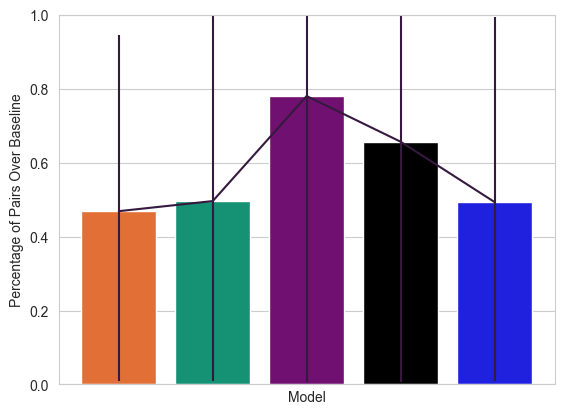

In [194]:
sns.barplot(x, palette=['#FF6719', '#00A67E', '#800080', '#000000', '#0000FF'])
plt.xlabel('Model')
plt.ylabel('Percentage of Pairs Over Baseline')
plt.errorbar([0, 1, 2, 3, 4], x, yerr = yerr)
plt.xticks([], [])
plt.ylim([0, 1])
plt.show()

In [111]:
mini = get_count('gpt4omini', 'free', overall_mean)
gpt4o = get_count('gpt4o', 'free', overall_mean)
gpt35 = get_count('gpt3.5turbo', 'free', overall_mean, fixed=True)
claude = get_count('claude35sonnet', 'free', overall_mean, fixed=True)
gpt4 = get_count('gpt4', 'free', overall_mean, fixed=True)

In [175]:
x = np.array([claude, gpt35, gpt4, gpt4o, mini]) / 15200

/var/folders/ym/chyzmxzn66l6xclhdgwgts7w0000gn/T/ipykernel_5699/842257309.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x, palette=['#FF6719', '#00A67E', '#800080', '#000000', '#0000FF'])


(0.0, 1.0)

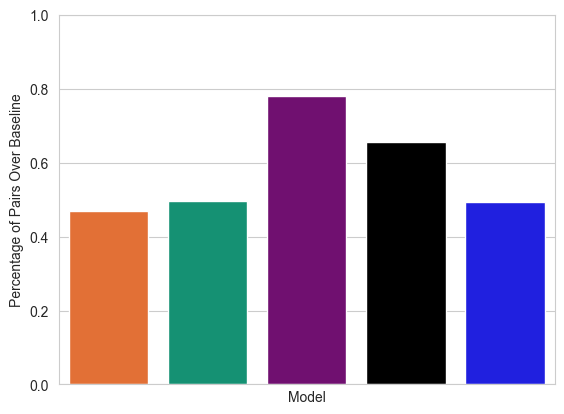

In [176]:
sns.barplot(x, palette=['#FF6719', '#00A67E', '#800080', '#000000', '#0000FF'])
plt.xlabel('Model')
plt.ylabel('Percentage of Pairs Over Baseline')
plt.xticks([], [])
plt.ylim([0, 1])

In [56]:
def get_means(path, fixed, eval_method):
    assert eval_method in ['ranks', 'berts']
    
    means = [[], []]

    for i in range(1, 21):
        try:
            loaded_berts = np.load(f'{path}/run{i}{fixed}/run{i}_{eval_method}.npz')
        except FileNotFoundError:
            break
        m1 = loaded_berts['move1']
        m2 = loaded_berts['move2']
        mean_m1 = m1.mean()
        mean_m2 = m2.mean()

        means[0].append(mean_m1)
        means[1].append(mean_m2)

    return means

In [3]:
def get_means_rank(path, fixed, eval_method):
    assert eval_method in ['spearman', 'kendall', 'hamming']
    
    means = [[], []]

    for i in range(1, 21):
        try:
            loaded_berts = np.load(f'{path}/run{i}{fixed}/run{i}_ranks.npz')
        except FileNotFoundError:
            break
        m1 = loaded_berts[f'{eval_method}_move1']
        m2 = loaded_berts[f'{eval_method}_move2']
        mean_m1 = m1.mean()
        mean_m2 = m2.mean()

        means[0].append(mean_m1)
        means[1].append(mean_m2)

    return means

# Revisionist vs. Status Quo Free

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
claude_s = get_means('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/claude35sonnet/free/status_quo/claude35sonnet-free-False-20-1.0/main', '', 'berts')
claude_r = get_means('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/claude35sonnet/free/revisionist/claude35sonnet-free-False-20-1.0/main', '_fixed', 'berts')

gpt35_s = get_means('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt3.5turbo/free/status_quo/gpt3.5turbo-free-False-20-1.0/main', '', 'berts')
gpt35_r = get_means('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt3.5turbo/free/revisionist/gpt3.5turbo-free-False-20-1.0/main', '_fixed', 'berts')

gpt4_s = get_means('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt4/free/status_quo/gpt4-free-False-20-1.0/main', '', 'berts')
gpt4_r = get_means('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt4/free/revisionist/gpt4-free-False-20-1.0/main', '_fixed', 'berts')

gpt4o_s = get_means('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt4o/free/status_quo/gpt4o-free-False-20-1.0/main', '', 'berts')
gpt4o_r = get_means('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt4o/free/revisionist/gpt4o-free-False-20-1.0/main', '', 'berts')

gpt4omini_s = get_means('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt4omini/free/status_quo/gpt4omini-free-False-20-1.0/main', '', 'berts')
gpt4omini_r = get_means('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt4omini/free/revisionist/gpt4omini-free-False-20-1.0/main', '', 'berts')

# explicit
claude_s_true = get_means('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/claude35sonnet/free/status_quo/claude35sonnet-free-True-20-1.0/main', '', 'berts')
claude_r_true = get_means('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/claude35sonnet/free/revisionist/claude35sonnet-free-True-20-1.0/main', '', 'berts')

gpt35_s_true = get_means('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt3.5turbo/free/status_quo/gpt3.5turbo-free-True-20-1.0/main', '', 'berts')
gpt35_r_true = get_means('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt3.5turbo/free/revisionist/gpt3.5turbo-free-True-20-1.0/main', '', 'berts')

gpt4_s_true = get_means('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt4/free/status_quo/gpt4-free-True-20-1.0/main', '', 'berts')
gpt4_r_true = get_means('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt4/free/revisionist/gpt4-free-True-20-1.0/main', '', 'berts')

gpt4o_s_true = get_means('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt4o/free/status_quo/gpt4o-free-True-20-1.0/main', '', 'berts')
gpt4o_r_true = get_means('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt4o/free/revisionist/gpt4o-free-True-20-1.0/main', '', 'berts')

gpt4omini_s_true = get_means('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt4omini/free/status_quo/gpt4omini-free-True-20-1.0/main', '', 'berts')
gpt4omini_r_true = get_means('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt4omini/free/revisionist/gpt4omini-free-True-20-1.0/main', '', 'berts')

In [58]:
import matplotlib.gridspec as gridspec
from matplotlib.patches import Patch


In [59]:
colors = ['#ff7f00', '#e41a1c', '#377eb8', '#4daf4a', '#984ea3']
colors2 = ['#FF4500', '#FF4500', '#00CC00', '#00CC00', '#A020F0', '#A020F0', '#CC1A1A', '#CC1A1A', '#4169e1', '#4169e1']
legend_handles = [
    Line2D([0], [0], color='#ff7f00', lw=4, label='Claude 3.5 Sonnet'),
    Line2D([0], [0], color='#e41a1c', lw=4, label='GPT-3.5 Turbo'),
    Line2D([0], [0], color='#377eb8', lw=4, label='GPT-4'),
    Line2D([0], [0], color='#4daf4a', lw=4, label='GPT-4o'),
    Line2D([0], [0], color='#984ea3', lw=4, label='GPT-4o mini')
]
exp2_handles = [
    Line2D([0], [0], color='#4169E1', lw=4, label='Status Quo'),
    Line2D([0], [0], color='#CC1A1A', lw=4, label='Revisionist')
]

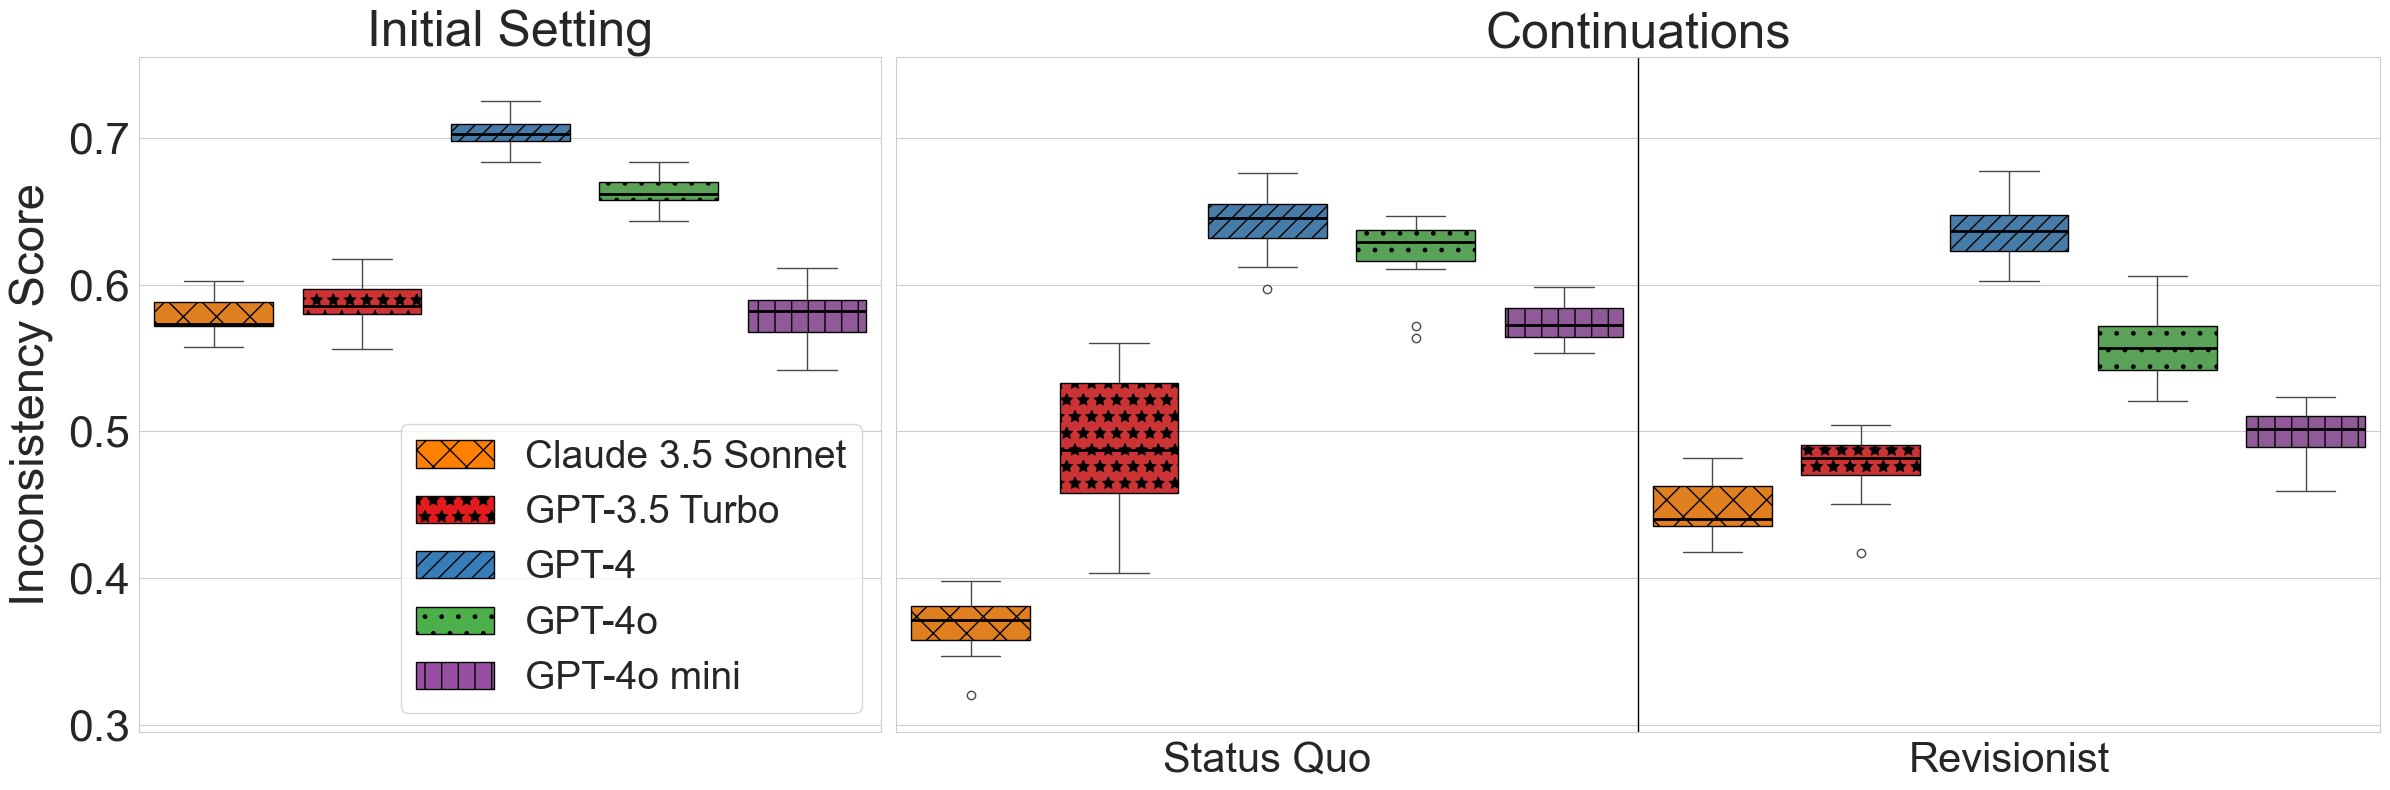

In [298]:
### ANON

fig = plt.figure(figsize=(24, 8))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 2])

ax = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1], sharey=ax1)
hatches = ['x', '*', '//', '.', '|']
legend_handles2 = [
    Patch(facecolor=colors[0], edgecolor='black', hatch=hatches[0], label='Claude 3.5 Sonnet'),
    Patch(facecolor=colors[1], edgecolor='black', hatch=hatches[1], label='GPT-3.5 Turbo'),
    Patch(facecolor=colors[2], edgecolor='black', hatch=hatches[2], label='GPT-4'),
    Patch(facecolor=colors[3], edgecolor='black', hatch=hatches[3], label='GPT-4o'),
    Patch(facecolor=colors[4], edgecolor='black', hatch=hatches[4], label='GPT-4o mini')
]

### FIRST EXP
y = sns.boxplot([claude_r[0], gpt35_r[0], gpt4_r[0], gpt4o_r[0], gpt4omini_r[0]], palette=colors, ax=ax)

# Apply hatches to the boxes
for i, box in enumerate(y.patches):
    box.set_hatch(hatches[i % len(hatches)])  # Cycle through the hatches
    box.set_edgecolor('black')
    box.set_linewidth(1)

for i, line in enumerate(ax.lines[4:4*len(data):6]):  # Median lines appear every 6th element starting at index 4
    line.set_color('black')  # Set the color
    line.set_linestyle('-')
    line.set_linewidth(2)  # Optionally adjust line width

ax.set_ylim((0.29474717378616333, 0.755534827709198))
ax.set_ylabel('Inconsistency Score', fontsize=34, labelpad=10)
ax.set_xticks(range(5))
ax.set_xticklabels([''] * 5)
# ax.set_xlabel('Model', fontsize=32)
ax.tick_params(axis='both', labelsize=32)
ax.legend(handles=legend_handles2, fontsize=28, loc='lower right')
ax.set_title('Initial Setting', fontsize=36)
ax2.set_title('Continuations', fontsize=36)

### SECOND EXP
data = [claude_s[1], gpt35_s[1], gpt4_s[1], gpt4o_s[1], gpt4omini_s[1], claude_r[1],  gpt35_r[1],  gpt4_r[1],  gpt4o_r[1], gpt4omini_r[1]]
x = sns.boxplot([claude_s[1], gpt35_s[1], gpt4_s[1], gpt4o_s[1], gpt4omini_s[1], claude_r[1],  gpt35_r[1],  gpt4_r[1],  gpt4o_r[1], gpt4omini_r[1]], 
            palette=colors*2, ax=ax2)


# Apply hatches to the boxes
# Apply hatches to the boxes
for i, box in enumerate(x.patches):
    box.set_hatch(hatches[i % len(hatches)])  # Cycle through the hatches
    box.set_edgecolor('black')

for i, line in enumerate(ax2.lines[4:4*len(data)*2:6]):  # Median lines appear every 6th element starting at index 4
    line.set_color('black')  # Set the color
    line.set_linestyle('-')
    line.set_linewidth(2)  # Optionally adjust line width

ax2.set_yticklabels([])
ax2.set_xticks([2, 7])
ax2.set_xticklabels(['Status Quo', 'Revisionist'])
# ax.set_xlabel('Model', fontsize=32)
ax2.tick_params(axis='both', labelsize=30)
# ax2.legend(handles=exp2_handles, fontsize=26, loc='upper right')

for i in [4.5]:
    ax2.axvline(x=i, color='black', linewidth=1)

plt.tight_layout()
plt.savefig("main_results_anon.pdf", bbox_inches='tight', dpi=fig.dpi)

plt.show()

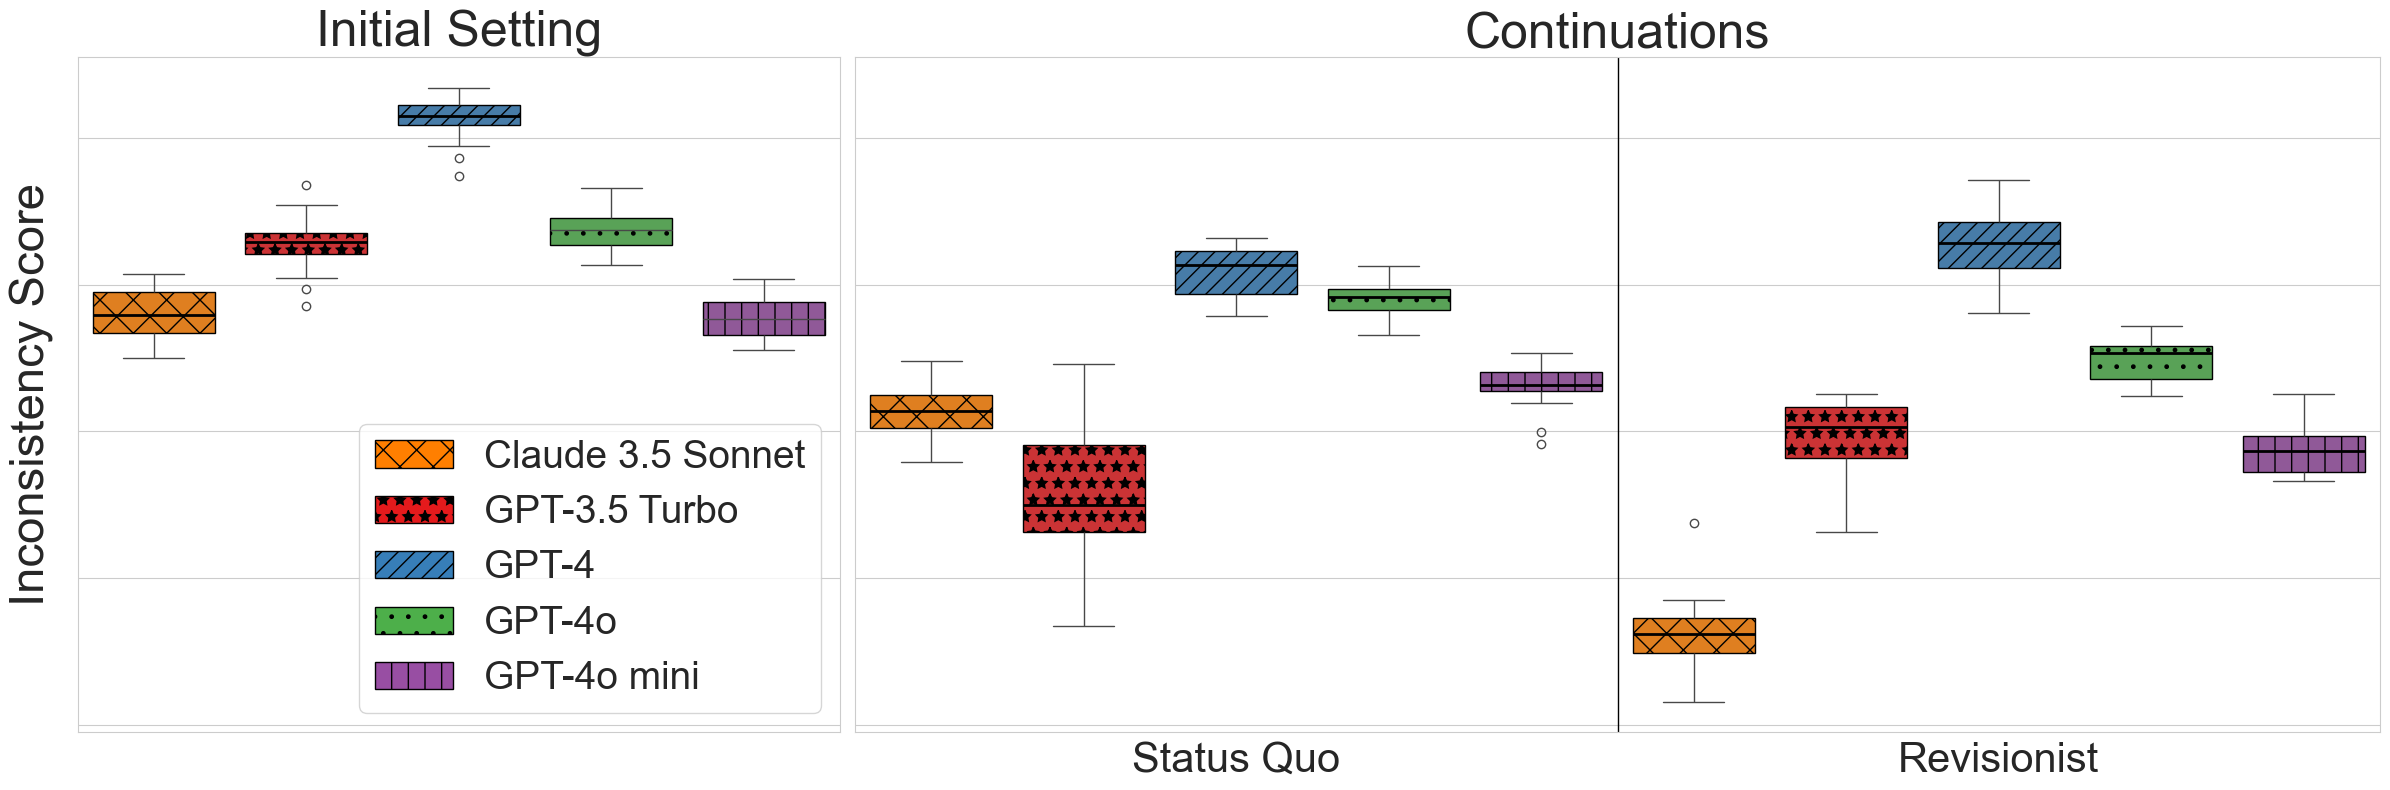

In [62]:
### EXP

fig = plt.figure(figsize=(24, 8))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 2])

ax = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1], sharey=ax)
hatches = ['x', '*', '//', '.', '|']
legend_handles2 = [
    Patch(facecolor='#ff7f00', edgecolor='black', hatch=hatches[0], label='Claude 3.5 Sonnet'),
    Patch(facecolor='#e41a1c', edgecolor='black', hatch=hatches[1], label='GPT-3.5 Turbo'),
    Patch(facecolor='#377eb8', edgecolor='black', hatch=hatches[2], label='GPT-4'),
    Patch(facecolor='#4daf4a', edgecolor='black', hatch=hatches[3], label='GPT-4o'),
    Patch(facecolor='#984ea3', edgecolor='black', hatch=hatches[4], label='GPT-4o mini')
]

### FIRST EXP
data = [claude_r_true[0], gpt35_r_true[0], gpt4_r_true[0], gpt4o_r_true[0], gpt4omini_r_true[0]]
y = sns.boxplot([claude_r_true[0], gpt35_r_true[0], gpt4_r_true[0], gpt4o_r_true[0], gpt4omini_r_true[0]], palette=colors, ax=ax)

# Apply hatches to the boxes
for i, box in enumerate(y.patches):
    box.set_hatch(hatches[i % len(hatches)])  # Cycle through the hatches
    box.set_edgecolor('black')
    box.set_linewidth(1)

for i, line in enumerate(ax.lines[4:4*len(data):6]):  # Median lines appear every 6th element starting at index 4
    line.set_color('black')  # Set the color
    line.set_linestyle('-')
    line.set_linewidth(2)  # Optionally adjust line width

ax.set_ylim((0.29474717378616333, 0.755534827709198))
ax.set_ylabel('Inconsistency Score', fontsize=34, labelpad=10)
ax.set_xticks(range(5))
ax.set_xticklabels([''] * 5)
# ax.set_xlabel('Model', fontsize=32)
ax.tick_params(axis='both', labelsize=32)
ax.legend(handles=legend_handles2, fontsize=28, loc='lower right')
ax.set_title('Initial Setting', fontsize=36)
ax2.set_title('Continuations', fontsize=36)

### SECOND EXP
data = [claude_s_true[1], gpt35_s_true[1], gpt4_s_true[1], gpt4o_s_true[1], gpt4omini_s_true[1], claude_r_true[1],  gpt35_r_true[1],  gpt4_r_true[1],  gpt4o_r_true[1], gpt4omini_r_true[1]]
x = sns.boxplot([claude_s_true[1], gpt35_s_true[1], gpt4_s_true[1], gpt4o_s_true[1], gpt4omini_s_true[1], claude_r_true[1],  gpt35_r_true[1],  gpt4_r_true[1],  gpt4o_r_true[1], gpt4omini_r_true[1]], 
            palette=colors*2, ax=ax2)


# Apply hatches to the boxes
# Apply hatches to the boxes
for i, box in enumerate(x.patches):
    box.set_hatch(hatches[i % len(hatches)])  # Cycle through the hatches
    box.set_edgecolor('black')

for i, line in enumerate(ax2.lines[4:4*len(data)*2:6]):  # Median lines appear every 6th element starting at index 4
    line.set_color('black')  # Set the color
    line.set_linestyle('-')
    line.set_linewidth(2)  # Optionally adjust line width

ax2.set_yticklabels([])
ax2.set_xticks([2, 7])
ax2.set_xticklabels(['Status Quo', 'Revisionist'])
# ax.set_xlabel('Model', fontsize=32)
ax2.tick_params(axis='both', labelsize=30)
# ax2.legend(handles=exp2_handles, fontsize=26, loc='upper right')

for i in [4.5]:
    ax2.axvline(x=i, color='black', linewidth=1)

plt.tight_layout()
plt.savefig("main_results.pdf", bbox_inches='tight', dpi=fig.dpi)

plt.show()

/var/folders/ym/chyzmxzn66l6xclhdgwgts7w0000gn/T/ipykernel_88947/2103325698.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''])


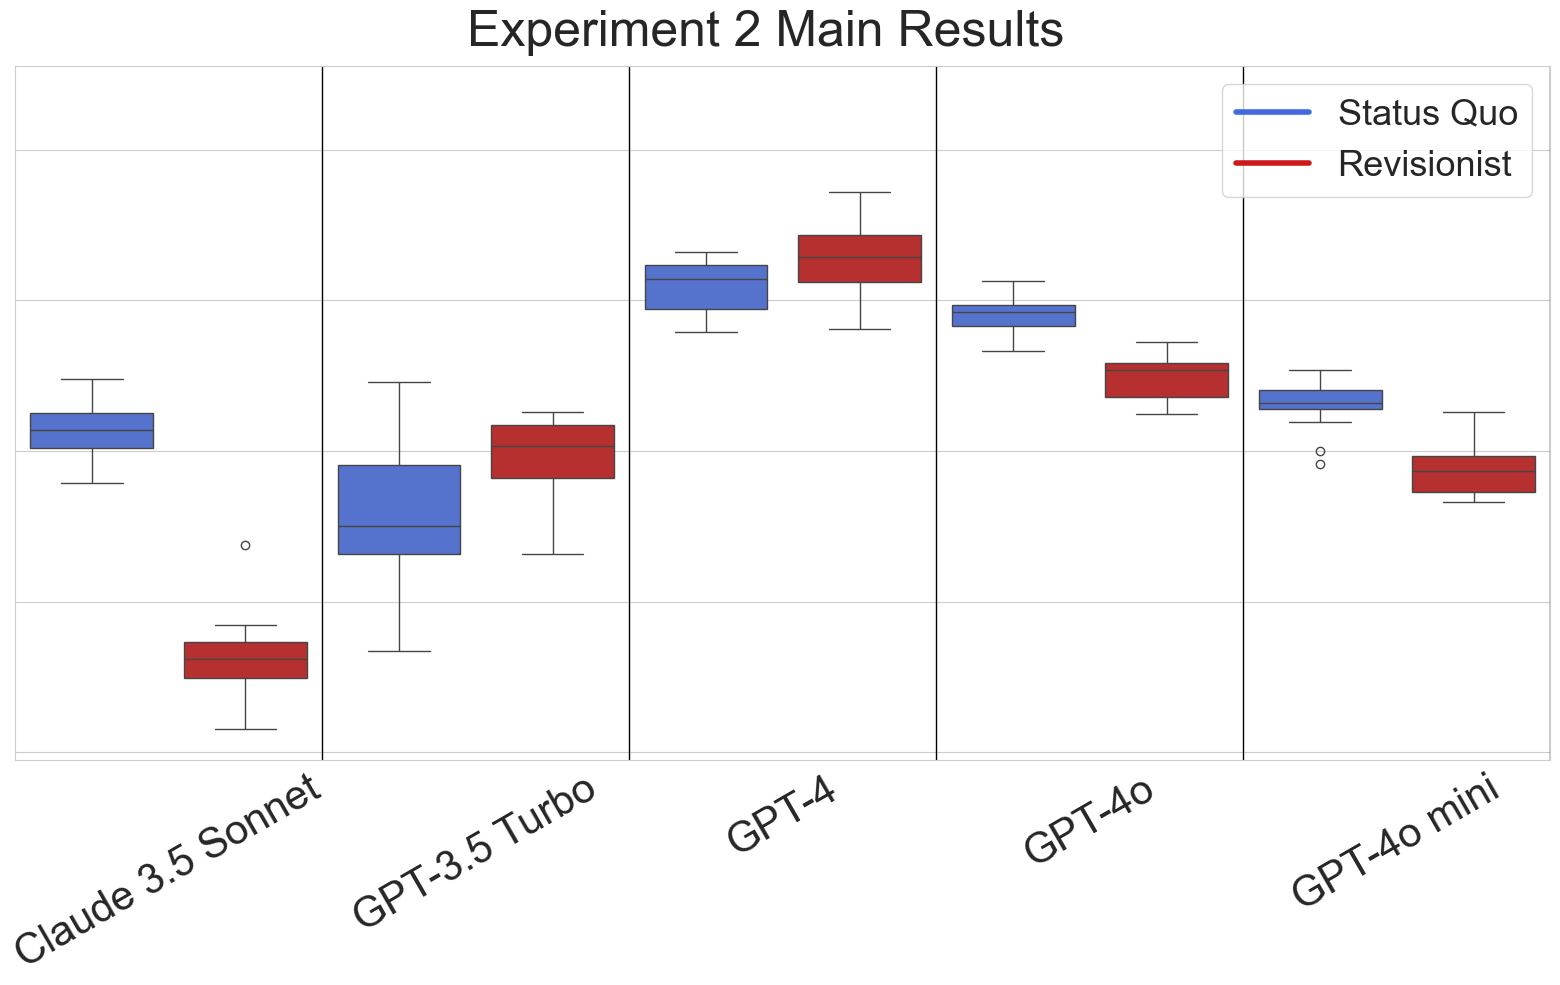

In [162]:
fig, ax = plt.subplots(figsize=(16,10))
fig.suptitle('Experiment 2 Main Results', fontsize=36)

sns.boxplot([claude_s_true[1], claude_r_true[1], gpt35_s_true[1], gpt35_r_true[1], gpt4_s_true[1], gpt4_r_true[1], gpt4o_s_true[1], gpt4o_r_true[1], gpt4omini_s_true[1], gpt4omini_r_true[1]], 
            palette=['#4169E1', '#CC1A1A'] * 5)
            # boxprops=dict(hatch=['.', '*'] * 5[i], positions=[i]))
ax.set_ylim((0.29474717378616333, 0.755534827709198))
# ax.set_ylabel('Inconsistency Score', fontsize=32, labelpad=10)
#ax.set_ylabel('Inconsistency Score', fontsize=32)
ax.set_yticklabels([''])
ax.set_xticks([0.5, 2.5, 4.5, 6.5, 8.5])
ax.set_xticklabels(['Claude 3.5 Sonnet', 'GPT-3.5 Turbo', 'GPT-4', 'GPT-4o', 'GPT-4o mini'], rotation=30)
# ax.set_xlabel('Model', fontsize=32)
ax.tick_params(axis='both', labelsize=30)
ax.legend(handles=exp2_handles, fontsize=26)

for i in [1.5, 3.5, 5.5, 7.5, 9.5]:
    plt.axvline(x=i, color='black', linewidth=1)

plt.tight_layout()
plt.savefig("exp2_plot.pdf", bbox_inches='tight', dpi=300)

# Adjust the layout
# plt.subplots_adjust(wspace=0.05, hspace=0.12)


# Show the plot
plt.show()

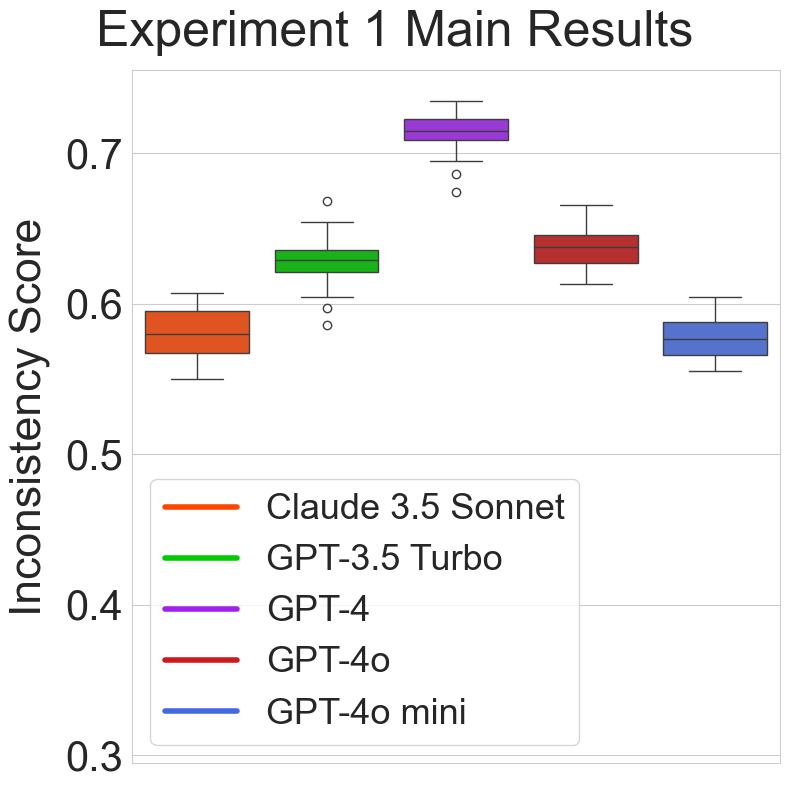

In [144]:
fig, ax = plt.subplots(figsize=(8,8))
fig.suptitle('Experiment 1 Main Results', fontsize=36)

sns.boxplot([claude_r_true[0], gpt35_r_true[0], gpt4_r_true[0], gpt4o_r_true[0], gpt4omini_r_true[0]], palette=colors)
ax.set_ylim((0.29474717378616333, 0.755534827709198))
ax.set_ylabel('Inconsistency Score', fontsize=32, labelpad=10)
ax.set_xticks(range(5))
ax.set_xticklabels([''] * 5)
# ax.set_xlabel('Model', fontsize=32)
ax.tick_params(axis='both', labelsize=30)
ax.legend(handles=legend_handles, fontsize=26)

plt.tight_layout()

plt.savefig("exp1_plot.pdf", bbox_inches='tight', dpi=300)

# Adjust the layout
# plt.subplots_adjust(wspace=0.05, hspace=0.12)


# Show the plot
plt.show()

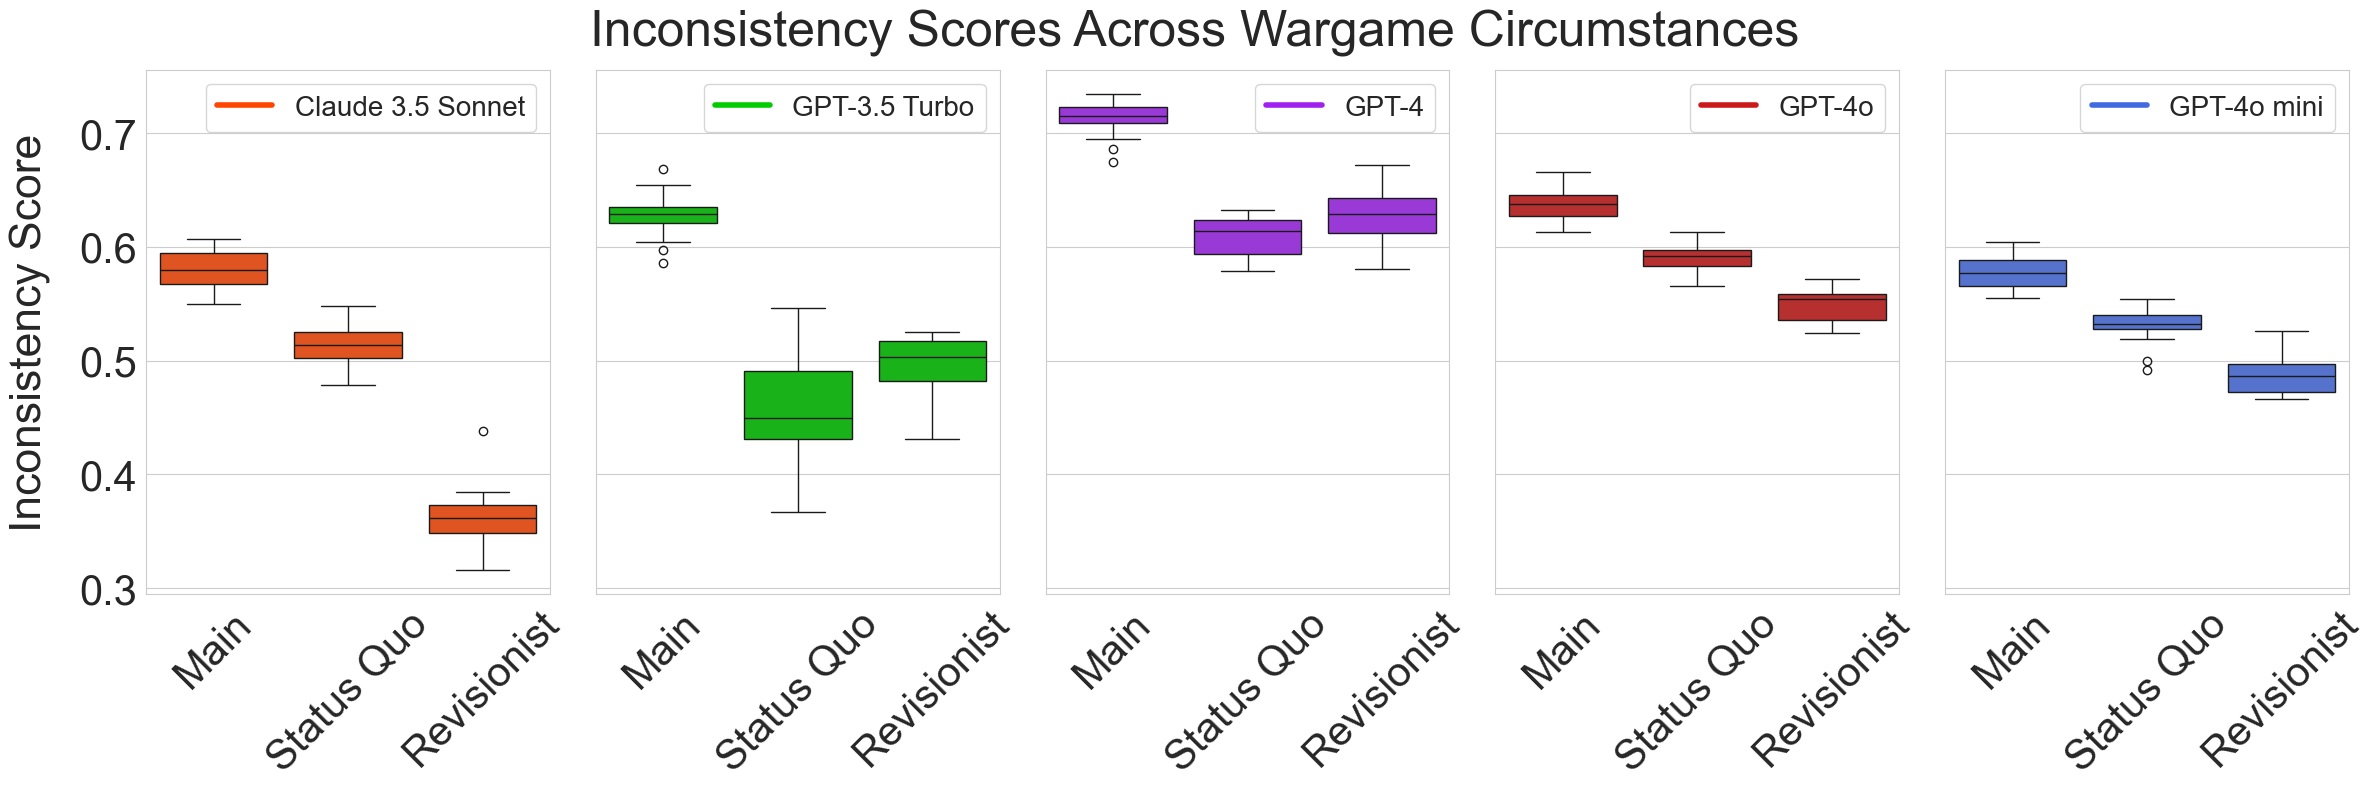

In [190]:
fig, axs = plt.subplots(1, 5, figsize=(24, 8), sharey=True)
fig.suptitle('Inconsistency Scores Across Wargame Circumstances', fontsize=36)


sns.boxplot([claude_r_true[0], claude_s_true[1], claude_r_true[1]], ax=axs[0], color='#FF4500')
axs[0].set_ylabel('Inconsistency Score', fontsize=32, labelpad=20)
axs[0].set_xticks([0, 1, 2])
axs[0].set_xticklabels(['Main', 'Status Quo', 'Revisionist'], rotation=45)
# axs[0].set_ylim(0, 1)  # Adjust based on your data range
axs[0].tick_params(axis='both', labelsize=30)
axs[0].legend(handles=[Line2D([0], [0], color='#FF4500', lw=4, label='Claude 3.5 Sonnet')], fontsize=20)


sns.boxplot([gpt35_r_true[0], gpt35_s_true[1], gpt35_r_true[1]], ax=axs[1], color='#00CC00')
axs[1].set_xticks([0, 1, 2])
axs[1].set_xticklabels(['Main', 'Status Quo', 'Revisionist'], rotation=45)
axs[1].tick_params(axis='both', labelsize=30)
axs[1].legend(handles=[Line2D([0], [0], color='#00CC00', lw=4, label='GPT-3.5 Turbo')], fontsize=20)

sns.boxplot([gpt4_r_true[0], gpt4_s_true[1], gpt4_r_true[1]], ax=axs[2], color='#A020F0')
axs[2].set_xticks([0, 1, 2])
axs[2].set_xticklabels(['Main', 'Status Quo', 'Revisionist'], rotation=45)
axs[2].tick_params(axis='both', labelsize=30)
axs[2].legend(handles=[Line2D([0], [0], color='#A020F0', lw=4, label='GPT-4')], fontsize=20)

sns.boxplot([gpt4o_r_true[0], gpt4o_s_true[1], gpt4o_r_true[1]], ax=axs[3], color='#CC1A1A')
axs[3].set_xticks([0, 1, 2])
axs[3].set_xticklabels(['Main', 'Status Quo', 'Revisionist'], rotation=45)
axs[3].tick_params(axis='both', labelsize=30)
axs[3].legend(handles=[Line2D([0], [0], color='#CC1A1A', lw=4, label='GPT-4o')], fontsize=20)

sns.boxplot([gpt4omini_r_true[0], gpt4omini_s_true[1], gpt4omini_r_true[1]], ax=axs[4], color='#4169e1')
axs[4].set_xticks([0, 1, 2])
axs[4].set_xticklabels(['Main', 'Status Quo', 'Revisionist'], rotation=45)
axs[4].tick_params(axis='both', labelsize=30)
axs[4].legend(handles=[Line2D([0], [0], color='#4169e1', lw=4, label='GPT-4o mini')], fontsize=20)

plt.tight_layout()
plt.savefig("plot.pdf", bbox_inches='tight', dpi=300)

# Adjust the layout
# plt.subplots_adjust(wspace=0.05, hspace=0.12)


# Show the plot
plt.show()

In [123]:
from utils.bootstrap import bootstrap_mean

In [124]:
claude_main_free = bootstrap_mean(claude_r_true[0], n=10_000)
gpt35_main_free = bootstrap_mean(gpt35_r_true[0], n=10_000)
gpt4_main_free = bootstrap_mean(gpt4_r_true[0], n=10_000)
gpt4o_main_free = bootstrap_mean(gpt4o_r_true[0], n=10_000)
gpt4omini_main_free = bootstrap_mean(gpt4omini_r_true[0], n=10_000)

claude_s_free = bootstrap_mean(claude_s_true[1], n=10_000)
gpt35_s_free = bootstrap_mean(gpt35_s_true[1], n=10_000)
gpt4_s_free = bootstrap_mean(gpt4_s_true[1], n=10_000)
gpt4o_s_free = bootstrap_mean(gpt4o_s_true[1], n=10_000)
gpt4omini_s_free = bootstrap_mean(gpt4omini_s_true[1], n=10_000)

claude_r_free = bootstrap_mean(claude_r_true[1], n=10_000)
gpt35_r_free = bootstrap_mean(gpt35_r_true[1], n=10_000)
gpt4_r_free = bootstrap_mean(gpt4_r_true[1], n=10_000)
gpt4o_r_free = bootstrap_mean(gpt4o_r_true[1], n=10_000)
gpt4omini_r_free = bootstrap_mean(gpt4omini_r_true[1], n=10_000)

In [125]:
# main
claude_main_bootstrapped_min, claude_main_bootstrapped_max = (
    np.percentile(claude_main_free, 2.5), np.percentile(claude_main_free, 97.5)
)
gpt35_main_bootstrapped_min, gpt35_main_bootstrapped_max = (
    np.percentile(gpt35_main_free, 2.5), np.percentile(gpt35_main_free, 97.5)
)
gpt4_main_bootstrapped_min, gpt4_main_bootstrapped_max = (
    np.percentile(gpt4_main_free, 2.5), np.percentile(gpt4_main_free, 97.5)
)
gpt4o_main_bootstrapped_min, gpt4o_main_bootstrapped_max = (
    np.percentile(gpt4o_main_free, 2.5), np.percentile(gpt4o_main_free, 97.5)
)
gpt4omini_main_bootstrapped_min, gpt4omini_main_bootstrapped_max = (
    np.percentile(gpt4omini_main_free, 2.5), np.percentile(gpt4omini_main_free, 97.5)
)

#status quo
claude_s_bootstrapped_min, claude_s_bootstrapped_max = (
    np.percentile(claude_s_free, 2.5), np.percentile(claude_s_free, 97.5)
)
gpt35_s_bootstrapped_min, gpt35_s_bootstrapped_max = (
    np.percentile(gpt35_s_free, 2.5), np.percentile(gpt35_s_free, 97.5)
)
gpt4_s_bootstrapped_min, gpt4_s_bootstrapped_max = (
    np.percentile(gpt4_s_free, 2.5), np.percentile(gpt4_s_free, 97.5)
)
gpt4o_s_bootstrapped_min, gpt4o_s_bootstrapped_max = (
    np.percentile(gpt4o_s_free, 2.5), np.percentile(gpt4o_s_free, 97.5)
)
gpt4omini_s_bootstrapped_min, gpt4omini_s_bootstrapped_max = (
    np.percentile(gpt4omini_s_free, 2.5), np.percentile(gpt4omini_s_free, 97.5)
)

#revisionist
claude_r_bootstrapped_min, claude_r_bootstrapped_max = (
    np.percentile(claude_r_free, 2.5), np.percentile(claude_r_free, 97.5)
)
gpt35_r_bootstrapped_min, gpt35_r_bootstrapped_max = (
    np.percentile(gpt35_r_free, 2.5), np.percentile(gpt35_r_free, 97.5)
)
gpt4_r_bootstrapped_min, gpt4_r_bootstrapped_max = (
    np.percentile(gpt4_r_free, 2.5), np.percentile(gpt4_r_free, 97.5)
)
gpt4o_r_bootstrapped_min, gpt4o_r_bootstrapped_max = (
    np.percentile(gpt4o_r_free, 2.5), np.percentile(gpt4o_r_free, 97.5)
)
gpt4omini_r_bootstrapped_min, gpt4omini_r_bootstrapped_max = (
    np.percentile(gpt4omini_r_free, 2.5), np.percentile(gpt4omini_r_free, 97.5)
)

In [129]:
# main
df = pd.DataFrame(index=['Claude 3.5 Sonnet', 'GPT-3.5 Turbo', 'GPT-4', 'GPT-4o', 'GPT-4o mini'],
                  columns=['Main', 'Status Quo', 'Revisionist'])
df.loc['Claude 3.5 Sonnet', 'Main']= f'{np.mean(claude_r_true[0]):.5f} ± {(claude_main_bootstrapped_max - np.mean(claude_r_true[0])):.5f} - {(np.mean(claude_r_true[0]) - claude_main_bootstrapped_min):.5f}'
df.loc['GPT-3.5 Turbo', 'Main']= f'{np.mean(gpt35_r_true[0]):.5f} + {(gpt35_main_bootstrapped_max - np.mean(gpt35_r_true[0])):.5f} - {(np.mean(gpt35_r_true[0]) - gpt35_main_bootstrapped_min):.5f}'
df.loc['GPT-4', 'Main']= f'{np.mean(gpt4_r_true[0]):.5f} + {(gpt4_main_bootstrapped_max - np.mean(gpt4_r_true[0])):.5f} - {(np.mean(gpt4_r_true[0]) - gpt4_main_bootstrapped_min):.5f}'
df.loc['GPT-4o', 'Main']= f'{np.mean(gpt4o_r_true[0]):.5f} + {(gpt4o_main_bootstrapped_max - np.mean(gpt4o_r_true[0])):.5f} - {(np.mean(gpt4o_r_true[0]) - gpt4o_main_bootstrapped_min):.5f}'
df.loc['GPT-4o mini', 'Main']= f'{np.mean(gpt4omini_r_true[0]):.5f} + {(gpt4omini_main_bootstrapped_max - np.mean(gpt4omini_r_true[0])):.5f} - {(np.mean(gpt4omini_r_true[0]) - gpt4omini_main_bootstrapped_min):.5f}'

# status quo
df.loc['Claude 3.5 Sonnet', 'Status Quo']= f'{np.mean(claude_s_true[1]):.5f} ± {(claude_s_bootstrapped_max - np.mean(claude_s_true[1])):.5f} - {(np.mean(claude_s_true[1]) - claude_s_bootstrapped_min):.5f}'
df.loc['GPT-3.5 Turbo', 'Status Quo']= f'{np.mean(gpt35_s_true[1]):.5f} + {(gpt35_s_bootstrapped_max - np.mean(gpt35_s_true[1])):.5f} - {(np.mean(gpt35_s_true[1]) - gpt35_s_bootstrapped_min):.5f}'
df.loc['GPT-4', 'Status Quo']= f'{np.mean(gpt4_s_true[1]):.5f} + {(gpt4_s_bootstrapped_max - np.mean(gpt4_s_true[1])):.5f} - {(np.mean(gpt4_s_true[1]) - gpt4_s_bootstrapped_min):.5f}'
df.loc['GPT-4o', 'Status Quo']= f'{np.mean(gpt4o_s_true[1]):.5f} + {(gpt4o_s_bootstrapped_max - np.mean(gpt4o_s_true[1])):.5f} - {(np.mean(gpt4o_s_true[1]) - gpt4o_s_bootstrapped_min):.5f}'
df.loc['GPT-4o mini', 'Status Quo']= f'{np.mean(gpt4omini_s_true[1]):.5f} + {(gpt4omini_s_bootstrapped_max - np.mean(gpt4omini_s_true[1])):.5f} - {(np.mean(gpt4omini_s_true[1]) - gpt4omini_s_bootstrapped_min):.5f}'

# revisionist
df.loc['Claude 3.5 Sonnet', 'Revisionist']= f'{np.mean(claude_r_true[1]):.5f} ± {(claude_r_bootstrapped_max - np.mean(claude_r_true[1])):.5f} - {(np.mean(claude_r_true[1]) - claude_r_bootstrapped_min):.5f}'
df.loc['GPT-3.5 Turbo', 'Revisionist']= f'{np.mean(gpt35_r_true[1]):.5f} + {(gpt35_r_bootstrapped_max - np.mean(gpt35_r_true[1])):.5f} - {(np.mean(gpt35_r_true[1]) - gpt35_r_bootstrapped_min):.5f}'
df.loc['GPT-4', 'Revisionist']= f'{np.mean(gpt4_r_true[1]):.5f} + {(gpt4_r_bootstrapped_max - np.mean(gpt4_r_true[1])):.5f} - {(np.mean(gpt4_r_true[1]) - gpt4_r_bootstrapped_min):.5f}'
df.loc['GPT-4o', 'Revisionist']= f'{np.mean(gpt4o_r_true[1]):.5f} + {(gpt4o_r_bootstrapped_max - np.mean(gpt4o_r_true[1])):.5f} - {(np.mean(gpt4o_r_true[1]) - gpt4o_r_bootstrapped_min):.5f}'
df.loc['GPT-4o mini', 'Revisionist']= f'{np.mean(gpt4omini_r_true[1]):.5f} + {(gpt4omini_r_bootstrapped_max - np.mean(gpt4omini_r_true[1])):.5f} - {(np.mean(gpt4omini_r_true[1]) - gpt4omini_r_bootstrapped_min):.5f}'

df

,Main,Status Quo,Revisionist
Claude 3.5 Sonnet,0.58087 ± 0.00711 - 0.00733,0.51287 ± 0.00784 - 0.00790,0.36153 ± 0.01172 - 0.01074
GPT-3.5 Turbo,0.62711 + 0.00787 - 0.00803,0.46227 + 0.01951 - 0.01911,0.49459 + 0.01174 - 0.01272
GPT-4,0.71265 + 0.00566 - 0.00645,0.60862 + 0.00757 - 0.00770,0.62723 + 0.00982 - 0.01020
GPT-4o,0.63661 + 0.00608 - 0.00613,0.58997 + 0.00524 - 0.00554,0.55001 + 0.00544 - 0.00549
GPT-4o mini,0.57785 + 0.00638 - 0.00624,0.53110 + 0.00585 - 0.00673,0.48749 + 0.00724 - 0.00666


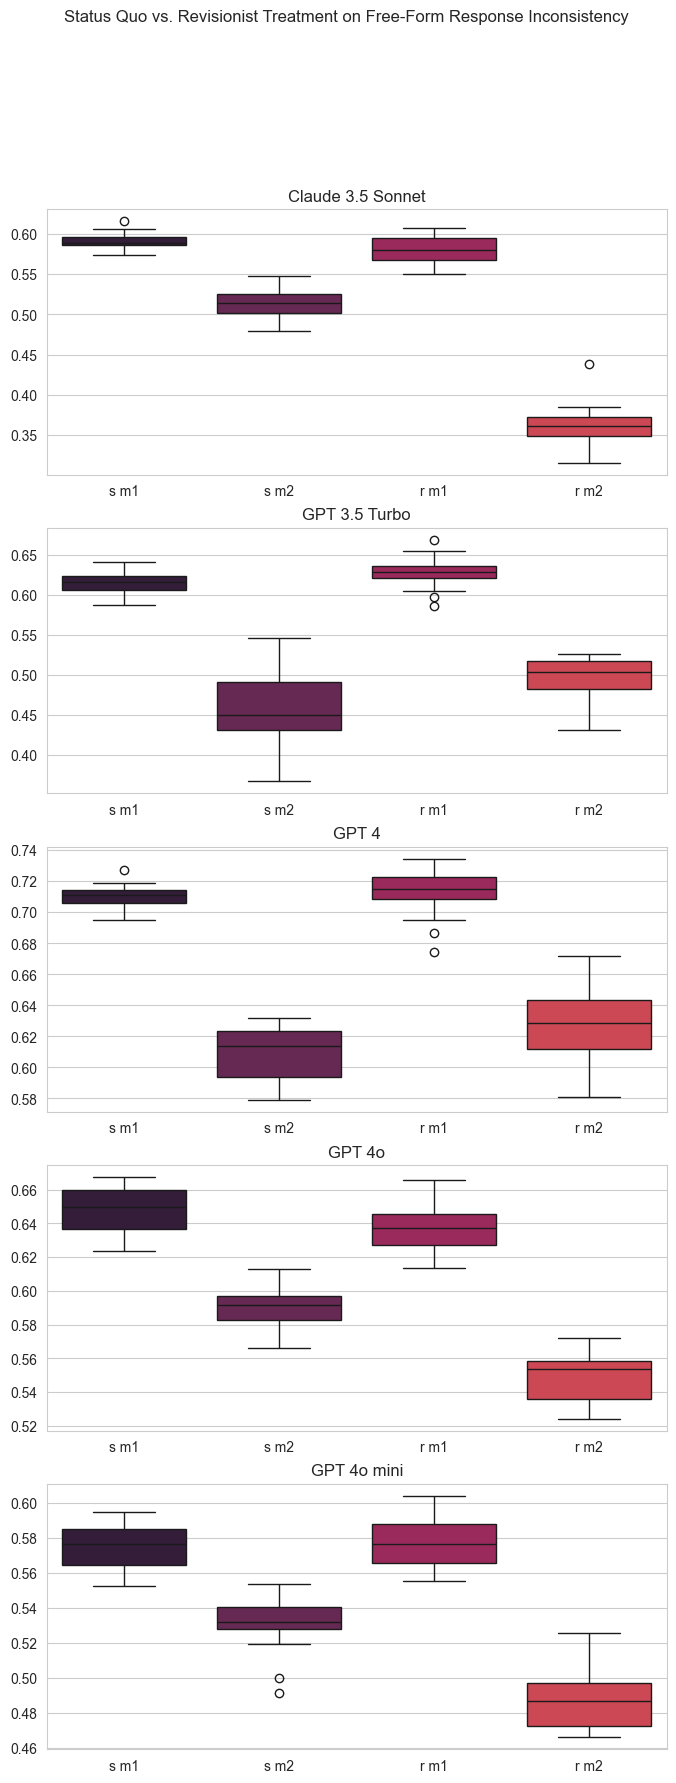

In [27]:
fig, axs = plt.subplots(5, 1, figsize=(8, 20), sharey='row')
fig.suptitle('Status Quo vs. Revisionist Treatment on Free-Form Response Inconsistency')
# explicit
sns.boxplot(pd.DataFrame(claude_s_true + claude_r_true).T, ax=axs[0])
axs[0].set_title('Claude 3.5 Sonnet')
axs[0].set_xticks([0, 1, 2, 3])
axs[0].set_xticklabels(['s m1', 's m2', 'r m1', 'r m2'])

sns.boxplot(pd.DataFrame(gpt35_s_true + gpt35_r_true).T, ax=axs[1])
axs[1].set_title('GPT 3.5 Turbo')
axs[1].set_xticks([0, 1, 2, 3])
axs[1].set_xticklabels(['s m1', 's m2', 'r m1', 'r m2'])

sns.boxplot(pd.DataFrame(gpt4_s_true + gpt4_r_true).T, ax=axs[2])
axs[2].set_title('GPT 4')
axs[2].set_xticks([0, 1, 2, 3])
axs[2].set_xticklabels(['s m1', 's m2', 'r m1', 'r m2'])

sns.boxplot(pd.DataFrame(gpt4o_s_true + gpt4o_r_true).T, ax=axs[3])
axs[3].set_title('GPT 4o')
axs[3].set_xticks([0, 1, 2, 3])
axs[3].set_xticklabels(['s m1', 's m2', 'r m1', 'r m2'])

sns.boxplot(pd.DataFrame(gpt4omini_s_true + gpt4omini_r_true).T, ax=axs[4])
axs[4].set_title('GPT 4o mini')
axs[4].set_xticks([0, 1, 2, 3])
axs[4].set_xticklabels(['s m1', 's m2', 'r m1', 'r m2'])

# plt.tight_layout()
plt.show()

# Revisionist vs. Status Quo Rank

In [46]:
claude_s = get_means_rank('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/claude35sonnet/rank/status_quo/claude35sonnet-rank-False-20-1.0/main', '', 'kendall')
claude_r = get_means_rank('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/claude35sonnet/rank/revisionist/claude35sonnet-rank-False-20-1.0/main', '_fixed', 'kendall')

gpt35_s = get_means_rank('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt3.5turbo/rank/status_quo/gpt3.5turbo-rank-False-20-1.0/main', '', 'kendall')
gpt35_r = get_means_rank('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt3.5turbo/rank/revisionist/gpt3.5turbo-rank-False-20-1.0/main', '_fixed', 'kendall')

gpt4_s = get_means_rank('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt4/rank/status_quo/gpt4-rank-False-20-1.0/main', '', 'kendall')
gpt4_r = get_means_rank('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt4/rank/revisionist/gpt4-rank-False-20-1.0/main', '_fixed', 'kendall')

gpt4o_s = get_means_rank('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt4o/rank/status_quo/gpt4o-rank-False-20-1.0/main', '', 'kendall')
gpt4o_r = get_means_rank('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt4o/rank/revisionist/gpt4o-rank-False-20-1.0/main', '', 'kendall')

gpt4omini_s = get_means_rank('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt4omini/rank/status_quo/gpt4omini-rank-False-20-1.0/main', '', 'kendall')
gpt4omini_r = get_means_rank('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt4omini/rank/revisionist/gpt4omini-rank-False-20-1.0/main', '', 'kendall')

# explicit
claude_s_true = get_means_rank('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/claude35sonnet/rank/status_quo/claude35sonnet-rank-True-20-1.0/main', '', 'kendall')
claude_r_true = get_means_rank('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/claude35sonnet/rank/revisionist/claude35sonnet-rank-True-20-1.0/main', '', 'kendall')

gpt35_s_true = get_means_rank('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt3.5turbo/rank/status_quo/gpt3.5turbo-rank-True-20-1.0/main', '', 'kendall')
gpt35_r_true = get_means_rank('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt3.5turbo/rank/revisionist/gpt3.5turbo-rank-True-20-1.0/main', '', 'kendall')

gpt4_s_true = get_means_rank('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt4/rank/status_quo/gpt4-rank-True-20-1.0/main', '', 'kendall')
gpt4_r_true = get_means_rank('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt4/rank/revisionist/gpt4-rank-True-20-1.0/main', '', 'kendall')

gpt4o_s_true = get_means_rank('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt4o/rank/status_quo/gpt4o-rank-True-20-1.0/main', '', 'kendall')
gpt4o_r_true = get_means_rank('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt4o/rank/revisionist/gpt4o-rank-True-20-1.0/main', '', 'kendall')

gpt4omini_s_true = get_means_rank('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt4omini/rank/status_quo/gpt4omini-rank-True-20-1.0/main', '', 'kendall')
gpt4omini_r_true = get_means_rank('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt4omini/rank/revisionist/gpt4omini-rank-True-20-1.0/main', '', 'kendall')

gpt4omini_r_true_reversed = get_means_rank('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt4omini/rank/revisionist/reversed/gpt4omini-rank-True-20-1.0/main', '', 'kendall')


In [52]:
np.mean(gpt4omini_r_true_reversed[0]), np.mean(gpt4omini_r_true[0])

(0.1277131425053863, 0.19861803631886735)

In [23]:
len(claude_r_true[0]), len(gpt35_r_true[0]), len(gpt4_r_true[0]), len(gpt4o_r_true[0]), len(gpt4omini_r_true[0])

(20, 20, 20, 20, 20)

In [33]:
ax.get_ylim()

(-0.005837180670975686, 0.2742582333025546)

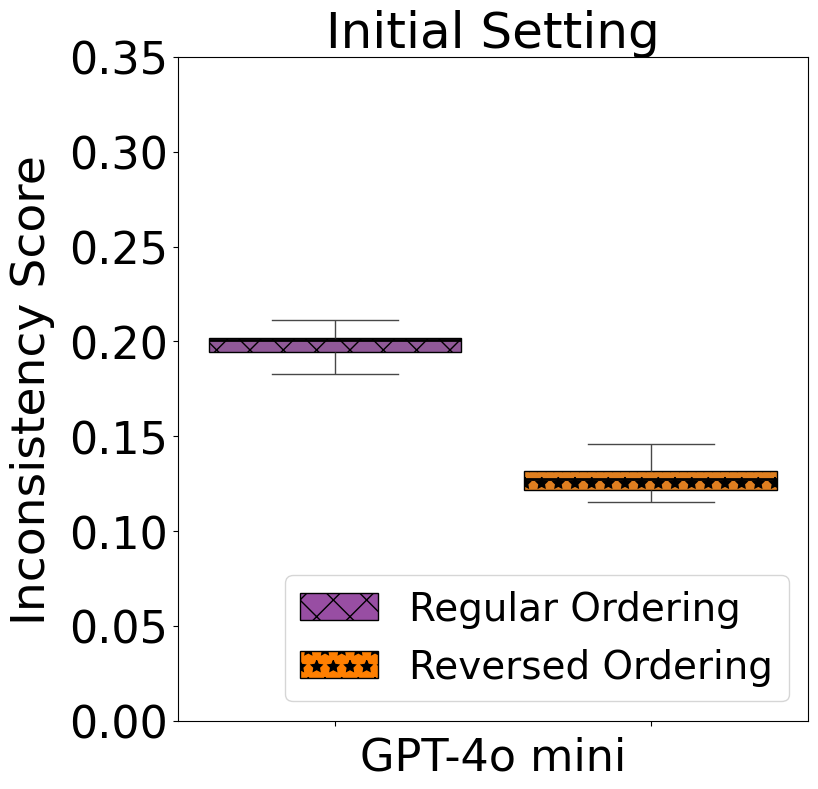

In [58]:
### EXP

fig = plt.figure(figsize=(8, 8))
gs = gridspec.GridSpec(1,1)

ax = fig.add_subplot(gs[0])
# ax2 = fig.add_subplot(gs[1], sharey=ax)
hatches = ['x', '*', '//', '.', '|']
legend_handles2 = [
    Patch(facecolor='#984ea3', edgecolor='black', hatch=hatches[0], label='Regular Ordering'),
    Patch(facecolor='#ff7f00', edgecolor='black', hatch=hatches[1], label='Reversed Ordering')
]

### FIRST EXP
y = sns.boxplot([gpt4omini_r_true[0], gpt4omini_r_true_reversed[0]], palette=['#984ea3', '#ff7f00'], ax=ax)

# Apply hatches to the boxes
for i, box in enumerate(y.patches):
    box.set_hatch(hatches[i % len(hatches)])  # Cycle through the hatches
    box.set_edgecolor('black')
    box.set_linewidth(1)

for i, line in enumerate(ax.lines[4:4*len(data):6]):  # Median lines appear every 6th element starting at index 4
    line.set_color('black')  # Set the color
    line.set_linestyle('-')
    line.set_linewidth(2)  # Optionally adjust line width

ax.set_ylim((0, 0.35))
ax.set_title('Initial Setting', fontsize=36)
ax.set_ylabel('Inconsistency Score', fontsize=34, labelpad=10)
ax.set_xticks(range(2))
ax.set_xticklabels([''] * 2)
ax.set_xlabel('GPT-4o mini', fontsize=32)
ax.tick_params(axis='both', labelsize=32)
ax.tick_params(axis='y', labelleft=True)


ax.legend(handles=legend_handles2, fontsize=28, loc='lower right')

plt.tight_layout()
plt.savefig("rankordering.pdf", bbox_inches='tight', dpi=fig.dpi)

plt.show()


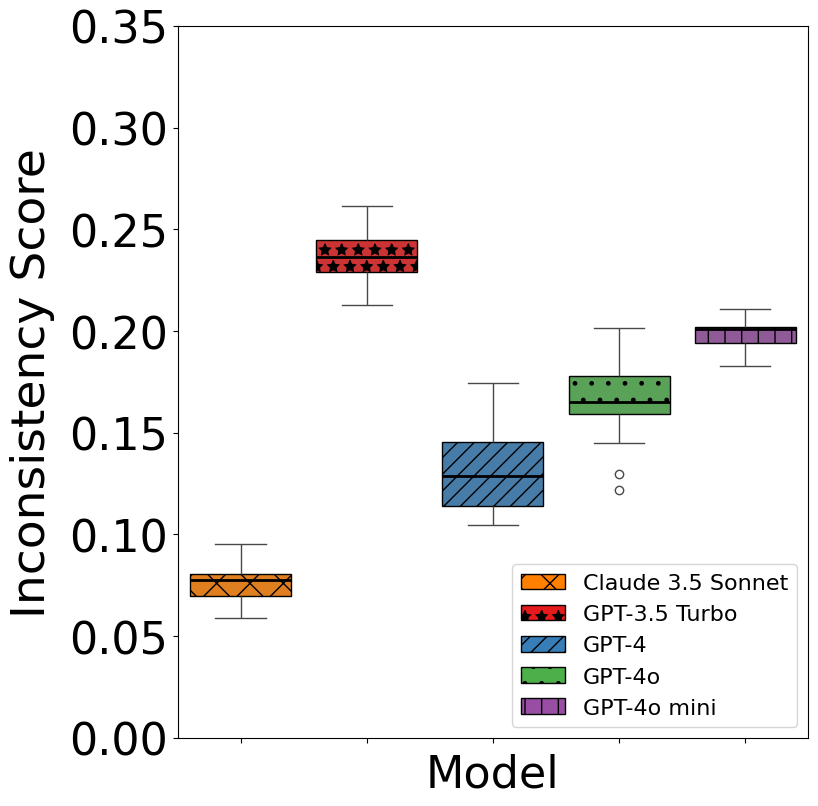

In [59]:
### EXP

fig = plt.figure(figsize=(8, 8))
gs = gridspec.GridSpec(1,1)

ax = fig.add_subplot(gs[0])
# ax2 = fig.add_subplot(gs[1], sharey=ax)
hatches = ['x', '*', '//', '.', '|']
legend_handles2 = [
    Patch(facecolor='#ff7f00', edgecolor='black', hatch=hatches[0], label='Claude 3.5 Sonnet'),
    Patch(facecolor='#e41a1c', edgecolor='black', hatch=hatches[1], label='GPT-3.5 Turbo'),
    Patch(facecolor='#377eb8', edgecolor='black', hatch=hatches[2], label='GPT-4'),
    Patch(facecolor='#4daf4a', edgecolor='black', hatch=hatches[3], label='GPT-4o'),
    Patch(facecolor='#984ea3', edgecolor='black', hatch=hatches[4], label='GPT-4o mini')
]

### FIRST EXP
y = sns.boxplot([claude_r_true[0], gpt35_r_true[0], gpt4_r_true[0], gpt4o_r_true[0], gpt4omini_r_true[0]], palette=colors, ax=ax)

# Apply hatches to the boxes
for i, box in enumerate(y.patches):
    box.set_hatch(hatches[i % len(hatches)])  # Cycle through the hatches
    box.set_edgecolor('black')
    box.set_linewidth(1)

for i, line in enumerate(ax.lines[4:4*len(data):6]):  # Median lines appear every 6th element starting at index 4
    line.set_color('black')  # Set the color
    line.set_linestyle('-')
    line.set_linewidth(2)  # Optionally adjust line width

ax.set_ylim((0, 0.35))
ax.set_ylabel('Inconsistency Score', fontsize=34, labelpad=10)
ax.set_xticks(range(5))
ax.set_xticklabels([''] * 5)
ax.set_xlabel('Model', fontsize=32)
ax.tick_params(axis='both', labelsize=32)
ax.tick_params(axis='y', labelleft=True)
ax.legend(handles=legend_handles2, fontsize=16, loc='lower right')

plt.tight_layout()
plt.savefig('main_results_rank.pdf', bbox_inches='tight', dpi=fig.dpi)

plt.show()

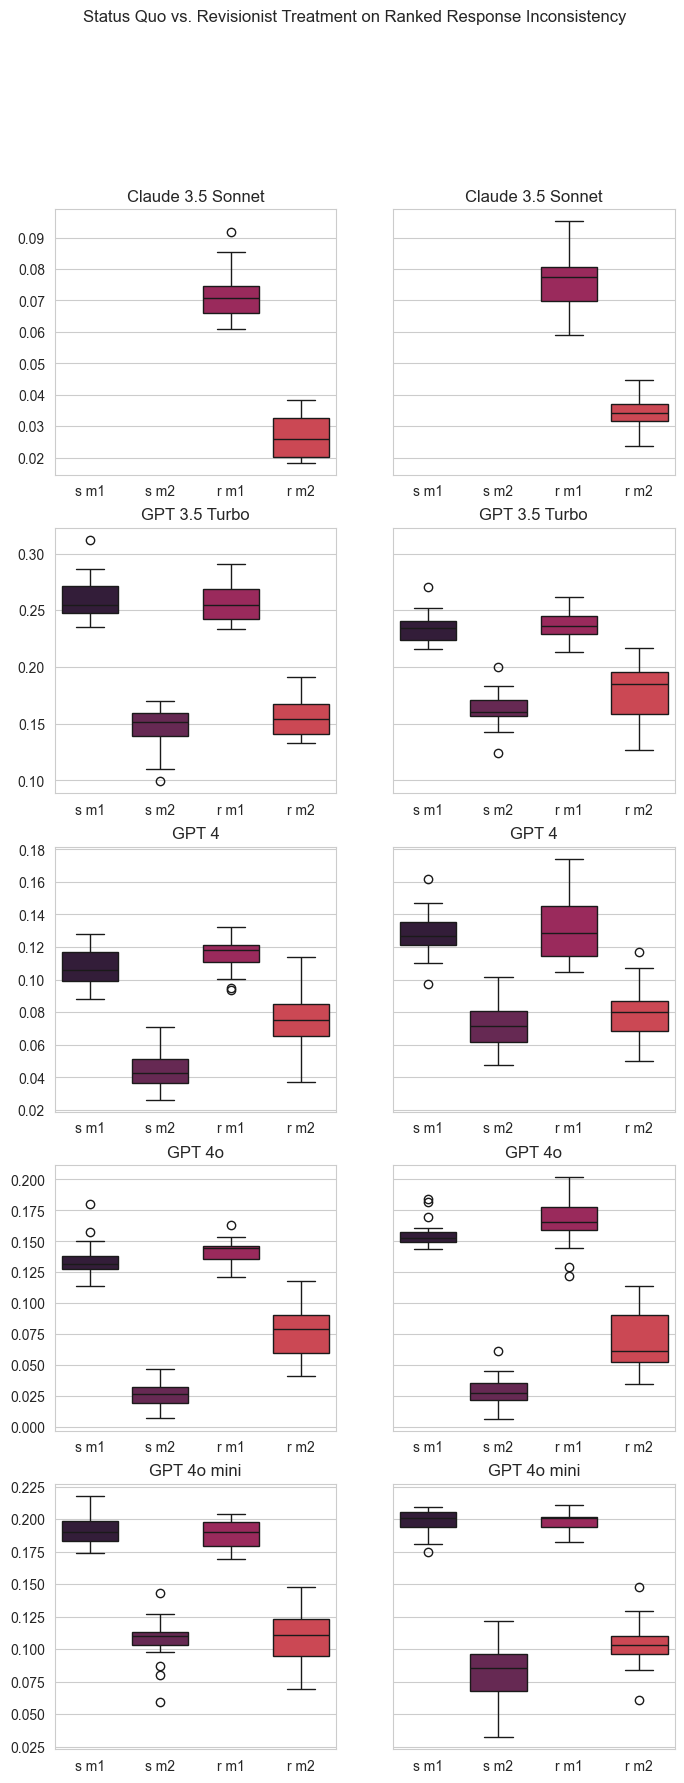

In [123]:
fig, axs = plt.subplots(5, 2, figsize=(8, 20), sharey='row')
fig.suptitle('Status Quo vs. Revisionist Treatment on Ranked Response Inconsistency')

sns.boxplot(pd.DataFrame(claude_s + claude_r).T, ax=axs[0][0])
axs[0][0].set_title('Claude 3.5 Sonnet')
axs[0][0].set_xticks([0, 1, 2, 3])
axs[0][0].set_xticklabels(['s m1', 's m2', 'r m1', 'r m2'])

sns.boxplot(pd.DataFrame(gpt35_s + gpt35_r).T, ax=axs[1][0])
axs[1][0].set_title('GPT 3.5 Turbo')
axs[1][0].set_xticks([0, 1, 2, 3])
axs[1][0].set_xticklabels(['s m1', 's m2', 'r m1', 'r m2'])

sns.boxplot(pd.DataFrame(gpt4_s + gpt4_r).T, ax=axs[2][0])
axs[2][0].set_title('GPT 4')
axs[2][0].set_xticks([0, 1, 2, 3])
axs[2][0].set_xticklabels(['s m1', 's m2', 'r m1', 'r m2'])

sns.boxplot(pd.DataFrame(gpt4o_s + gpt4o_r).T, ax=axs[3][0])
axs[3][0].set_title('GPT 4o')
axs[3][0].set_xticks([0, 1, 2, 3])
axs[3][0].set_xticklabels(['s m1', 's m2', 'r m1', 'r m2'])

sns.boxplot(pd.DataFrame(gpt4omini_s + gpt4omini_r).T, ax=axs[4][0])
axs[4][0].set_title('GPT 4o mini')
axs[4][0].set_xticks([0, 1, 2, 3])
axs[4][0].set_xticklabels(['s m1', 's m2', 'r m1', 'r m2'])

# explicit
sns.boxplot(pd.DataFrame(claude_s_true + claude_r_true).T, ax=axs[0][1])
axs[0][1].set_title('Claude 3.5 Sonnet')
axs[0][1].set_xticks([0, 1, 2, 3])
axs[0][1].set_xticklabels(['s m1', 's m2', 'r m1', 'r m2'])

sns.boxplot(pd.DataFrame(gpt35_s_true + gpt35_r_true).T, ax=axs[1][1])
axs[1][1].set_title('GPT 3.5 Turbo')
axs[1][1].set_xticks([0, 1, 2, 3])
axs[1][1].set_xticklabels(['s m1', 's m2', 'r m1', 'r m2'])

sns.boxplot(pd.DataFrame(gpt4_s_true + gpt4_r_true).T, ax=axs[2][1])
axs[2][1].set_title('GPT 4')
axs[2][1].set_xticks([0, 1, 2, 3])
axs[2][1].set_xticklabels(['s m1', 's m2', 'r m1', 'r m2'])

sns.boxplot(pd.DataFrame(gpt4o_s_true + gpt4o_r_true).T, ax=axs[3][1])
axs[3][1].set_title('GPT 4o')
axs[3][1].set_xticks([0, 1, 2, 3])
axs[3][1].set_xticklabels(['s m1', 's m2', 'r m1', 'r m2'])

sns.boxplot(pd.DataFrame(gpt4omini_s_true + gpt4omini_r_true).T, ax=axs[4][1])
axs[4][1].set_title('GPT 4o mini')
axs[4][1].set_xticks([0, 1, 2, 3])
axs[4][1].set_xticklabels(['s m1', 's m2', 'r m1', 'r m2'])

plt.show()

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
temps = [
    get_means(f'/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt4omini/free/revisionist/gpt4omini-free-True-20-{t}/main', '', 'berts') \
        for t in ['0.2', '0.4', '0.6', '0.8', '1.0', '1.2']
]
data = temps[0] + temps[1] + temps[2] + temps[3] + temps[4] + temps[5]

data = pd.DataFrame(data).T
data.columns = [
    '0.2 m1', '0.2 m2',
    '0.4 m1', '0.4 m2',
    '0.6 m1', '0.6 m2',
    '0.8 m1', '0.8 m2',
    '1.0 m1', '1.0 m2',
    '1.2 m1', '1.2 m2',
]

In [12]:
data

,0.2 m1,0.2 m2,0.4 m1,0.4 m2,0.6 m1,0.6 m2,0.8 m1,0.8 m2,1.0 m1,1.0 m2,1.2 m1,1.2 m2
0,0.405719,0.333635,0.425926,0.402909,0.518090,0.431493,0.555657,0.454926,0.600037,0.525729,0.618405,0.509594
1,0.432493,0.337717,0.452837,0.378426,0.509337,0.405552,0.521748,0.447365,0.563083,0.501373,0.623450,0.524969
2,0.408203,0.346538,0.452576,0.378962,0.495012,0.431616,0.514689,0.479574,0.555371,0.488374,0.603381,0.527080
3,0.390901,0.306327,0.472193,0.364177,0.490836,0.423145,0.538692,0.416304,0.601819,0.510678,0.600462,0.522872
4,0.399789,0.372718,0.437206,0.380569,0.477790,0.431870,0.535104,0.415647,0.572453,0.495663,0.599583,0.528151
5,0.413026,0.320107,0.451242,0.350768,0.486552,0.425472,0.538235,0.462395,0.585634,0.472694,0.614671,0.506294
6,0.443072,0.344322,0.448643,0.404217,0.470069,0.410393,0.537056,0.435259,0.575807,0.482602,0.646796,0.530586
7,0.413345,0.363137,0.466459,0.377502,0.509835,0.438339,0.525219,0.444989,0.589535,0.483455,0.590909,0.495885
8,0.414570,0.316176,0.472464,0.369116,0.494693,0.437186,0.515382,0.453528,0.562928,0.470986,0.625592,0.522631
9,0.441926,0.347957,0.425782,0.396641,0.478983,0.418864,0.537419,0.460112,0.588383,0.471221,0.617961,0.511324


In [28]:
[i * 0.2 for i in range(1, 7)]

[0.2, 0.4, 0.6000000000000001, 0.8, 1.0]

In [33]:
data = data[data.columns[0:len(data.columns):2]]

In [44]:
data.columns = [f'{i * 0.2:.1f}' for i in range(1, 7)]

In [45]:
data

,0.2,0.4,0.6,0.8,1.0,1.2
0,0.405719,0.425926,0.518090,0.555657,0.600037,0.618405
1,0.432493,0.452837,0.509337,0.521748,0.563083,0.623450
2,0.408203,0.452576,0.495012,0.514689,0.555371,0.603381
3,0.390901,0.472193,0.490836,0.538692,0.601819,0.600462
4,0.399789,0.437206,0.477790,0.535104,0.572453,0.599583
5,0.413026,0.451242,0.486552,0.538235,0.585634,0.614671
6,0.443072,0.448643,0.470069,0.537056,0.575807,0.646796
7,0.413345,0.466459,0.509835,0.525219,0.589535,0.590909
8,0.414570,0.472464,0.494693,0.515382,0.562928,0.625592
9,0.441926,0.425782,0.478983,0.537419,0.588383,0.617961


In [42]:
fig.suptitle('Experiment 1 Main Results', fontsize=36)

sns.boxplot([claude_r_true[0], gpt35_r_true[0], gpt4_r_true[0], gpt4o_r_true[0], gpt4omini_r_true[0]], palette=colors)
ax.set_ylim((0.29474717378616333, 0.755534827709198))
ax.set_ylabel('Inconsistency Score', fontsize=32, labelpad=10)
ax.set_xticks(range(5))
ax.set_xticklabels([''] * 5)
# ax.set_xlabel('Model', fontsize=32)
ax.tick_params(axis='both', labelsize=30)
ax.legend(handles=legend_handles, fontsize=26)

plt.tight_layout()

plt.savefig("exp1_plot.pdf", bbox_inches='tight', dpi=300)

# Adjust the layout
# plt.subplots_adjust(wspace=0.05, hspace=0.12)


# Show the plot
plt.show()

NameError: name 'claude_r_true' is not defined

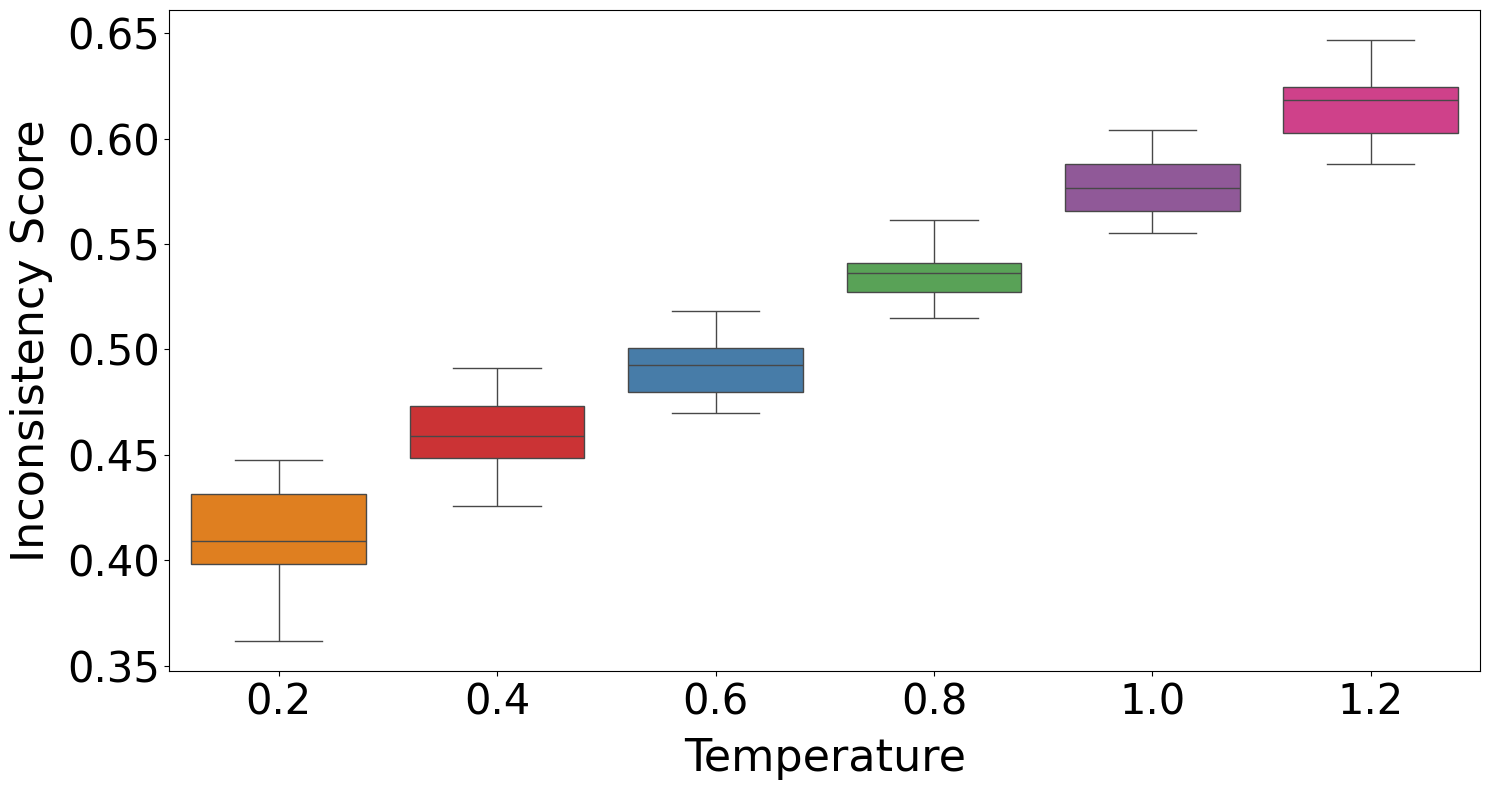

In [51]:
fig, ax = plt.subplots(figsize=(15,8))
# fig.suptitle('Effect of Temperature on Inconsistency', fontsize=36)


sns.boxplot(data, palette=colors + ['#e7298a'])
ax.set_ylabel('Inconsistency Score', fontsize=32, labelpad=10)
ax.tick_params(axis='both', labelsize=30)
ax.set_xlabel('Temperature', fontsize=32, labelpad=10)

plt.tight_layout()
plt.savefig("tempplot.pdf", bbox_inches='tight', dpi=300)
plt.show()

In [5]:
temps = [
    get_means_rank(f'/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt4omini/rank/revisionist/reversed/gpt4omini-rank-False-20-1.0/main', '', 'kendall'),
    get_means_rank(f'/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt4omini/rank/revisionist/gpt4omini-rank-False-20-1.0/main', '', 'kendall'),
    get_means_rank(f'/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt4omini/rank/revisionist/reversed/gpt4omini-rank-True-20-1.0/main', '', 'kendall'),
    get_means_rank(f'/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt4omini/rank/revisionist/gpt4omini-rank-True-20-1.0/main', '', 'kendall')
]
data = temps[0] + temps[1] + temps[2] + temps[3]

data = pd.DataFrame(data).T
data.columns = [
    'y m1', 'y m2',
    'not m1', 'not m2',
    'y m1 t', 'y m2 t',
    'not m1 t', 'not m2 t',
]

<Axes: >

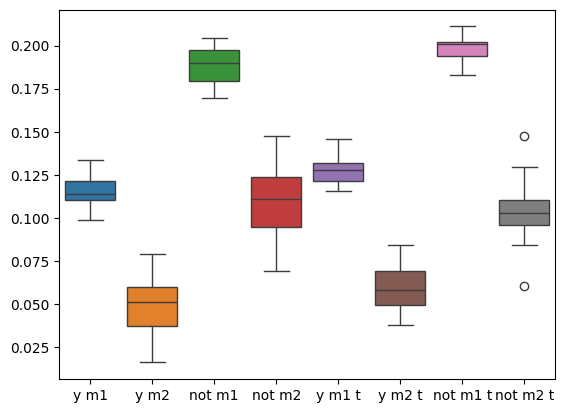

In [6]:
sns.boxplot(data)

In [3]:
import os

In [4]:
from utils.parse_csv import Parser

In [17]:
parser = Parser()

In [25]:
def split_rec_reas(row):
    recs = parser.get_free(row['Response'])
    reas = parser.get_free_reasoning(row['Response'])

    row['Recommendations'] = recs
    row['Reasoning'] = reas

    return row

In [80]:
all_fulls = []
for model in ['claude-3.5-sonnet', 'gpt-3.5-turbo', 'gpt-4', 'gpt-4o', 'gpt-4o-mini']:
    directory = f'/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/main_logging/{model}'
    dfs = []


    for f in os.listdir(directory):
        if '.csv' in f:
            df = pd.read_csv(directory + '/' + f)
            df['f_name'] = f[:-4]
            df = df.drop('Move Number', axis=1)
            df.columns = ['Response', 'File Name']
            dfs.append(df)

    full_df = pd.concat(dfs, ignore_index=True)
    full_df['Recommendations'] = np.nan
    full_df['Reasoning'] = np.nan
    full_df = full_df.apply(split_rec_reas, axis=1)
    full_df = full_df.drop('Response', axis=1)
    full_df = full_df.sort_values(by='File Name', ascending=False)
    full_df['Recommendations'].to_list()
    all_fulls.append(full_df)

In [43]:
from metrics.BERTScoreEval import BERTScoreEval

In [44]:
scorer = BERTScoreEval()

Initalizing BERTScore Evaluator...
BERTScore Evaluator Initialized


In [87]:
scores = []
for i, model in enumerate(['claude-3.5-sonnet', 'gpt-3.5-turbo', 'gpt-4', 'gpt-4o', 'gpt-4o-mini']):
    score = scorer.get_berts_within(all_fulls[i]['Recommendations'].to_list())
    scores.append(score)
    print(score.mean(), np.mean(data[i]))


tensor(0.6987) 0.58086973
tensor(0.6712) 0.62710583
tensor(0.5906) 0.7126519
tensor(0.6251) 0.63660693
tensor(0.5946) 0.577853


In [67]:
score = scorer.get_berts_within(all_dfs['Recommendations'].to_list())

In [69]:
score.mean()

tensor(0.6251)

In [70]:
data = [claude_r_true[0], gpt35_r_true[0], gpt4_r_true[0], gpt4o_r_true[0], gpt4omini_r_true[0]]

In [73]:
np.mean(gpt4o_r_true[0])

0.63660693